# **NOAA Weather Data Analysis - JFK Airport (New York)**
This notebook focuses on analyzing and forecasting weather patterns using the NOAA Weather Dataset collected from JFK Airport in New York. The dataset comprises 114,546 hourly observations of 12 key climatological variables, including temperature, wind speed, humidity, and pressure. This notebook teaches the user to extract, clean and analyze sample weather data and predict weather trends to help airports schedule better flight times.

The notebook is organized into three main parts:

---

## **Part 1: Data Cleaning**

In this section, we prepare the raw data for analysis by:

* Removing unnecessary or redundant columns to retain only relevant numerical features
* Converting data types and cleaning inconsistencies
* Handling missing values with appropriate filling strategies
* Encoding categorical weather features for downstream analysis

---

## **Part 2: Exploratory Data Analysis (EDA)**

Here, we perform visual and statistical exploration of the cleaned dataset:

* Load the cleaned data
* Generate insightful visualizations of key variables
* Identify trends, patterns, and seasonal effects in the time-series data

---

## **Part 3: Time Series Forecasting**

This section focuses on predicting future temperatures using time-series models:

* Load the cleaned and preprocessed data
* Establish baseline forecasting models
* Train and evaluate advanced statistical forecasting techniques

---

## **Part 1: Data Cleaning**

#### Download Dataset

In [356]:
# Import libraries
import pandas as pd
import numpy as np
import kagglehub
import warnings

# Download latest version
path = kagglehub.dataset_download("mexwell/noaa-weather-data-jfk-airport",)

print("Path to dataset files:", path)

Path to dataset files: /Users/azhar/.cache/kagglehub/datasets/mexwell/noaa-weather-data-jfk-airport/versions/1


#### Load Raw Data

In [357]:
# Load Datasets
import os

os.listdir(path)

# Load Dataset
df = pd.read_csv(f"{path}/jfk_weather.csv")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

#Check the data
df.head()

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_3509/1988764122.py:7: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,20,22,23,25,40,63,64,67,68,69,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/jfk_weather.csv")


STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
1  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
2  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
3  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
4  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   

   LONGITUDE              DATE REPORTTPYE           HOURLYSKYCONDITIONS  \
0   -73.7622  2010-01-01 00:51      FM-15  FEW:02 7 SCT:04 13 BKN:07 29   
1   -73.7622  2010-01-01 01:00      FM-12                           NaN   
2   -73.7622  2010-01-01 01:51      FM-15  FEW:02 6 SCT:04 13 OVC:08 35   
3   -73.7622  2010-01-01 02:03      FM-16  FEW:02 6 SCT:04 13 OVC:08 35   
4   -73.7622  2010-01-01 02:28      FM-16  BKN:07 7 BKN:07 15 OVC:08 35   

  HOURLYVISIBILITY                      HOURLYPRSENTWEATHERTYPE  \
0             6.00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79   
1             5.59                                      ||PL:79   
2             6.00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79   
3             6.00                    -RA:02 BR:1 |RA:61 |RA:61   
4             5.00                    -RA:02 BR:1 |RA:61 |RA:61   

  HOURLYDRYBULBTEMPF HOURLYDRYBULBTEMPC HOURLYWETBULBTEMPF HOURLYWETBULBTEMPC  \
0               33.0                0.6               32.0                0.1   
1               33.0                0.6               32.0                0.1   
2               33.0                0.6               33.0                0.3   
3               34.0                1.0               33.0                0.7   
4               34.0                1.0               33.0                0.7   

  HOURLYDewPointTempF HOURLYDewPointTempC HOURLYRelativeHumidity  \
0                  31                -0.6                   92.0   
1                  31                -0.6                   92.0   
2                  32                 0.0                   96.0   
3                  32                 0.0                   93.0   
4                  32                 0.0                   93.0   

  HOURLYWindSpeed HOURLYWindDirection  HOURLYWindGustSpeed  \
0             0.0                 000                  NaN   
1             0.0                 000                  NaN   
2             0.0                 000                  NaN   
3             0.0                 000                  NaN   
4             0.0                 000                  NaN   

  HOURLYStationPressure  HOURLYPressureTendency HOURLYPressureChange  \
0                 29.97                     8.0                  NaN   
1                 29.96                     8.0                +0.05   
2                 29.97                     NaN                  NaN   
3                 29.97                     NaN                  NaN   
4                 29.97                     NaN                  NaN   

  HOURLYSeaLevelPressure HOURLYPrecip HOURLYAltimeterSetting  \
0                  29.99         0.01                  29.99   
1                  29.99          NaN                    NaN   
2                  29.99         0.02                  29.99   
3                    NaN            T                  29.99   
4                    NaN            T                  29.99   

   DAILYMaximumDryBulbTemp  DAILYMinimumDryBulbTemp  DAILYAverageDryBulbTemp  \
0                      NaN                      NaN                      NaN   
1                     34.0                     30.0                     32.0   
2                      NaN                      NaN                      NaN   
3                      NaN                      NaN                      NaN   
4                      NaN                      NaN                      NaN   

   DAILYDeptFromNormalAverageTemp  DAILYAverageRelativeHumidity  \
0                             NaN                           NaN   
1                      

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114545 entries, 0 to 114544
Data columns (total 90 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   STATION                            114545 non-null  object 
 1   STATION_NAME                       114545 non-null  object 
 2   ELEVATION                          114545 non-null  float64
 3   LATITUDE                           114545 non-null  float64
 4   LONGITUDE                          114545 non-null  float64
 5   DATE                               114545 non-null  object 
 6   REPORTTPYE                         114545 non-null  object 
 7   HOURLYSKYCONDITIONS                93335 non-null   object 
 8   HOURLYVISIBILITY                   96464 non-null   object 
 9   HOURLYPRSENTWEATHERTYPE            19974 non-null   object 
 10  HOURLYDRYBULBTEMPF                 111405 non-null  object 
 11  HOURLYDRYBULBTEMPC                 1114

#### Select only Hourly Columns

In [359]:
# Select only columns related to hourly data
hourly_cols = [col for col in df.columns if 'hourly' in col.lower()] + ['DATE']
hourly_data = df[hourly_cols].copy()

# Set DATE as index
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data.DATE)).drop(columns=['DATE'])

hourly_data.head()

HOURLYSKYCONDITIONS HOURLYVISIBILITY  \
DATE                                                                 
2010-01-01 00:51:00  FEW:02 7 SCT:04 13 BKN:07 29             6.00   
2010-01-01 01:00:00                           NaN             5.59   
2010-01-01 01:51:00  FEW:02 6 SCT:04 13 OVC:08 35             6.00   
2010-01-01 02:03:00  FEW:02 6 SCT:04 13 OVC:08 35             6.00   
2010-01-01 02:28:00  BKN:07 7 BKN:07 15 OVC:08 35             5.00   

                                         HOURLYPRSENTWEATHERTYPE  \
DATE                                                               
2010-01-01 00:51:00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79   
2010-01-01 01:00:00                                      ||PL:79   
2010-01-01 01:51:00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79   
2010-01-01 02:03:00                    -RA:02 BR:1 |RA:61 |RA:61   
2010-01-01 02:28:00                    -RA:02 BR:1 |RA:61 |RA:61   

                    HOURLYDRYBULBTEMPF HOURLYDRYBULBTEMPC HOURLYWETBULBTEMPF  \
DATE                                                                           
2010-01-01 00:51:00               33.0                0.6               32.0   
2010-01-01 01:00:00               33.0                0.6               32.0   
2010-01-01 01:51:00               33.0                0.6               33.0   
2010-01-01 02:03:00               34.0                1.0               33.0   
2010-01-01 02:28:00               34.0                1.0               33.0   

                    HOURLYWETBULBTEMPC HOURLYDewPointTempF  \
DATE                                                         
2010-01-01 00:51:00                0.1                  31   
2010-01-01 01:00:00                0.1                  31   
2010-01-01 01:51:00                0.3                  32   
2010-01-01 02:03:00                0.7                  32   
2010-01-01 02:28:00                0.7                  32   

                    HOURLYDewPointTempC HOURLYRelativeHumidity  \
DATE                                                             
2010-01-01 00:51:00                -0.6                   92.0   
2010-01-01 01:00:00                -0.6                   92.0   
2010-01-01 01:51:00                 0.0                   96.0   
2010-01-01 02:03:00                 0.0                   93.0   
2010-01-01 02:28:00                 0.0                   93.0   

                    HOURLYWindSpeed HOURLYWindDirection  HOURLYWindGustSpeed  \
DATE                                                                           
2010-01-01 00:51:00             0.0                 000                  NaN   
2010-01-01 01:00:00             0.0                 000                  NaN   
2010-01-01 01:51:00             0.0                 000                  NaN   
2010-01-01 02:03:00             0.0                 000                  NaN   
2010-01-01 02:28:00             0.0                 000                  NaN   

                    HOURLYStationPressure  HOURLYPressureTendency  \
DATE                                                                
2010-01-01 00:51:00                 29.97                     8.0   
2010-01-01 01:00:00                 29.96                     8.0   
2010-01-01 01:51:00                 29.97                     NaN   
2010-01-01 02:03:00                 29.97                     NaN   
2010-01-01 02:28:00                 29.97                     NaN   

                    HOURLYPressureChange HOURLYSeaLevelPressure HOURLYPrecip  \
DATE                                                                           
2010-01-01 00:51:00                  NaN                  29.99         0.01   
2010-01-01 01:00:00                +0.05                  29.99          NaN   
2010-01-01 01:51:00                  NaN                  29.99         0.02   
2010-01-01 02:03:00                  NaN                    NaN            T   
2010-01-01 02:28:00                  NaN                    NaN            T  

In [360]:
unness_cols = [
    'HOURLYSKYCONDITIONS', 
    'HOURLYPRSENTWEATHERTYPE',
    'HOURLYDRYBULBTEMPC', 
    'HOURLYWETBULBTEMPC', 
    'HOURLYWindGustSpeed',
    'HOURLYPressureChange',
    'HOURLYDewPointTempC'
    ]

# Select only numeric columns
hourly_data = hourly_data.drop(columns=unness_cols)

hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   object 
 1   HOURLYDRYBULBTEMPF      111405 non-null  object 
 2   HOURLYWETBULBTEMPF      111247 non-null  object 
 3   HOURLYDewPointTempF     111397 non-null  object 
 4   HOURLYRelativeHumidity  111397 non-null  object 
 5   HOURLYWindSpeed         111358 non-null  object 
 6   HOURLYWindDirection     111237 non-null  object 
 7   HOURLYStationPressure   111256 non-null  object 
 8   HOURLYPressureTendency  48038 non-null   float64
 9   HOURLYSeaLevelPressure  99522 non-null   object 
 10  HOURLYPrecip            79763 non-null   object 
 11  HOURLYAltimeterSetting  86878 non-null   object 
dtypes: float64(1), object(11)
memory usage: 11.4+ MB


#### Clean up Unexpected Values

In [361]:
# Function to check unexpected values in object columns
def audit_garbage(df):
    found_garbage = False

    for col in df.select_dtypes(include=['object']).columns:
        numeric_attempts = pd.to_numeric(df[col], errors='coerce').isna()

        bad_mask = numeric_attempts & df[col].notna()

        if bad_mask.any():
            found_garbage = True
            unique_garbage = df.loc[bad_mask, col].unique()

            print(f"{col} contains: {unique_garbage}")
        if not found_garbage:
            print("No garbage values found.")

# Apply function
audit_garbage(hourly_data)

HOURLYVISIBILITY contains: ['2.50V' '3.00V' '0.75V' '1.00V' '2.00V' '1.50V' '0.25V' '1.75V' '0.00V'
 '0.12V' '0.50V' '1.25V' '0.12s' '0.50s']
HOURLYDRYBULBTEMPF contains: ['72s' '78s' '*']
HOURLYWETBULBTEMPF contains: ['*']
HOURLYDewPointTempF contains: ['-7s' '41s' '21s' '22s' '40s' '-6s' '42s' '23s' '-17s' '-22s' '35s' '55s'
 '7s' '24s' '30s' '36s' '34s' '68s' '*']
HOURLYRelativeHumidity contains: ['*']
HOURLYWindSpeed contains: ['31s']
HOURLYWindDirection contains: ['VRB']
HOURLYStationPressure contains: ['29.00s' '29.57s' '29.39s' '29.58s' '29.89s' '29.46s' '28.71s' '29.53s'
 '29.69s' '29.40s' '29.34s' '29.73s' '28.51s' '29.12s' '29.13s' '29.14s'
 '29.15s' '29.16s' '29.17s' '29.49s' '29.51s' '29.55s' '29.38s' '29.41s'
 '30.00s' '29.61s' '29.43s' '29.37s' '29.06s' '29.04s' '29.20s' '29.22s'
 '29.19s' '28.89s' '28.91s' '28.95s' '28.97s' '28.98s' '29.21s' '29.86s']
HOURLYSeaLevelPressure contains: ['29.02s' '29.60s' '28.74s' '28.59s' '29.14s' '29.16s' '29.18s' '29.19s'
 '29.27s' '29.4

In [362]:
# Remove unexpected values and convert to numeric
hourly_data = hourly_data.replace(to_replace=['*', 'T', '0.020.01s'], value=[np.nan, 0.00, np.nan])

for i in hourly_data.columns:
    hourly_data[i] = (hourly_data[i]
                      .astype('str')
                      .str.replace('[^0-9.-]', '', regex=True))
    hourly_data[i] = pd.to_numeric(hourly_data[i], errors='coerce')

In [363]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   float64
 1   HOURLYDRYBULBTEMPF      111403 non-null  float64
 2   HOURLYWETBULBTEMPF      111245 non-null  float64
 3   HOURLYDewPointTempF     111395 non-null  float64
 4   HOURLYRelativeHumidity  111395 non-null  float64
 5   HOURLYWindSpeed         111358 non-null  float64
 6   HOURLYWindDirection     110444 non-null  float64
 7   HOURLYStationPressure   111256 non-null  float64
 8   HOURLYPressureTendency  48038 non-null   float64
 9   HOURLYSeaLevelPressure  99522 non-null   float64
 10  HOURLYPrecip            79762 non-null   float64
 11  HOURLYAltimeterSetting  86878 non-null   float64
dtypes: float64(12)
memory usage: 11.4 MB
None


HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2010-01-01 00:51:00              6.00                33.0                32.0   
2010-01-01 01:00:00              5.59                33.0                32.0   
2010-01-01 01:51:00              6.00                33.0                33.0   
2010-01-01 02:03:00              6.00                34.0                33.0   
2010-01-01 02:28:00              5.00                34.0                33.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2010-01-01 00:51:00                 31.0                    92.0   
2010-01-01 01:00:00                 31.0                    92.0   
2010-01-01 01:51:00                 32.0                    96.0   
2010-01-01 02:03:00                 32.0                    93.0   
2010-01-01 02:28:00                 32.0                    93.0   

                     HOURLYWindSpeed  HOURLYWindDirection  \
DATE                                                        
2010-01-01 00:51:00              0.0                  0.0   
2010-01-01 01:00:00              0.0                  0.0   
2010-01-01 01:51:00              0.0                  0.0   
2010-01-01 02:03:00              0.0                  0.0   
2010-01-01 02:28:00              0.0                  0.0   

                     HOURLYStationPressure  HOURLYPressureTendency  \
DATE                                                                 
2010-01-01 00:51:00                  29.97                     8.0   
2010-01-01 01:00:00                  29.96                     8.0   
2010-01-01 01:51:00                  29.97                     NaN   
2010-01-01 02:03:00                  29.97                     NaN   
2010-01-01 02:28:00                  29.97                     NaN   

                     HOURLYSeaLevelPressure  HOURLYPrecip  \
DATE                                                        
2010-01-01 00:51:00                   29.99          0.01   
2010-01-01 01:00:00                   29.99           NaN   
2010-01-01 01:51:00                   29.99          0.02   
2010-01-01 02:03:00                     NaN          0.00   
2010-01-01 02:28:00                     NaN          0.00   

                     HOURLYAltimeterSetting  
DATE                                         
2010-01-01 00:51:00                   29.99  
2010-01-01 01:00:00                     NaN  
2010-01-01 01:51:00                   29.99  
2010-01-01 02:03:00                   29.99  
2010-01-01 02:28:00                   29.99

#### Reformat and Process Data

In [364]:
hourly_data.describe()

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
count      96464.000000       111403.000000       111245.000000   
mean           8.758806           55.310611           49.703097   
std            2.742651           17.169744           16.062113   
min            0.000000            1.000000           -1.000000   
25%            9.940000           42.000000           37.000000   
50%           10.000000           56.000000           50.000000   
75%           10.000000           70.000000           64.000000   
max           99.420000          102.000000           85.000000   

       HOURLYDewPointTempF  HOURLYRelativeHumidity  HOURLYWindSpeed  \
count        111395.000000           111395.000000    111358.000000   
mean             43.309197               67.132142        11.268045   
std              19.357060               20.278571         6.175006   
min             -22.000000                8.000000         0.000000   
25%              29.000000               51.000000         7.000000   
50%              45.000000               69.000000        10.000000   
75%              60.000000               85.000000        15.000000   
max              84.000000              100.000000        53.000000   

       HOURLYWindDirection  HOURLYStationPressure  HOURLYPressureTendency  \
count        110444.000000          111256.000000            48038.000000   
mean            192.511590              29.990639                4.388963   
std             107.606516               0.238452                2.741795   
min               0.000000              28.490000                0.000000   
25%             110.000000              29.850000                2.000000   
50%             200.000000              29.990000                5.000000   
75%             280.000000              30.140000                7.000000   
max             360.000000              30.830000                8.000000   

       HOURLYSeaLevelPressure  HOURLYPrecip  HOURLYAltimeterSetting  
count            99522.000000  79762.000000            86878.000000  
mean                30.026194      0.007032               30.009537  
std                  0.233693      0.042636                0.239821  
min                 28.540000      0.000000               28.510000  
25%                 29.880000      0.000000               29.870000  
50%                 30.020000      0.000000               30.010000  
75%                 30.170000      0.000000               30.160000  
max                 30.850000      2.410000               30.850000

According to the documentation, the HOURLYPressureTendency field should be an integer value in the range [0, 8]. Let's check if this condition holds for this dataset.

In [365]:
# Check if categorical variable HOURLYPressureTendency has values outside expected range
cond = (hourly_data['HOURLYPressureTendency'] < 0) | (hourly_data['HOURLYPressureTendency'] > 8)
print(f"Number of Hourly Pressure data outside expected range (0-8): {len(hourly_data[cond])}")

Number of Hourly Pressure data outside expected range (0-8): 0


In [366]:
# Check if categorical variable HOURLYVISIBILITY has values outside expected range
cond = (hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)
print(f"Number of Hourly Visibility data outside expected range (0-10): {len(hourly_data[cond])}")

hourly_data.loc[cond, 'HOURLYVISIBILITY'] = np.nan

Number of Hourly Visibility data outside expected range (0-10): 2


In [367]:
# Make sure time index is sorted and increasing
print('Date index is strictly increasing: {}'.format(hourly_data.index.is_monotonic_increasing))

Date index is strictly increasing: True


In [368]:
hourly_data.columns

Index(['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting'],
      dtype='object')

We will now also replace missing values. For numerical values, we will interpolate between the previous and next valid observations. For the categorical HOURLYPressureTendency field, we will replace missing values with the last valid observation.

In [369]:
hourly_data['HOURLYPressureTendency'] = hourly_data['HOURLYPressureTendency'].ffill()
hourly_data = hourly_data.interpolate(method='time')
hourly_data.drop(hourly_data.index[0], inplace=True)

In [370]:
hourly_data.reset_index(inplace=True)
hourly_data

DATE  HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  \
0      2010-01-01 01:00:00              5.59                33.0   
1      2010-01-01 01:51:00              6.00                33.0   
2      2010-01-01 02:03:00              6.00                34.0   
3      2010-01-01 02:28:00              5.00                34.0   
4      2010-01-01 02:51:00              5.00                33.0   
...                    ...               ...                 ...   
114539 2018-07-27 20:26:00             10.00                70.0   
114540 2018-07-27 20:51:00             10.00                71.0   
114541 2018-07-27 21:51:00             10.00                72.0   
114542 2018-07-27 22:51:00             10.00                72.0   
114543 2018-07-27 23:59:00             10.00                72.0   

        HOURLYWETBULBTEMPF  HOURLYDewPointTempF  HOURLYRelativeHumidity  \
0                     32.0                 31.0                    92.0   
1                     33.0                 32.0                    96.0   
2                     33.0                 32.0                    93.0   
3                     33.0                 32.0                    93.0   
4                     33.0                 32.0                    96.0   
...                    ...                  ...                     ...   
114539                69.0                 69.0                    97.0   
114540                70.0                 70.0                    96.0   
114541                71.0                 70.0                    94.0   
114542                71.0                 71.0                    97.0   
114543                71.0                 71.0                    97.0   

        HOURLYWindSpeed  HOURLYWindDirection  HOURLYStationPressure  \
0                   0.0                  0.0                  29.96   
1                   0.0                  0.0                  29.97   
2                   0.0                  0.0                  29.97   
3                   0.0                  0.0                  29.97   
4                   0.0                  0.0                  29.97   
...                 ...                  ...                    ...   
114539              5.0                 80.0                  30.00   
114540              0.0                  0.0                  30.02   
114541              5.0                 50.0                  30.00   
114542              0.0                  0.0                  30.01   
114543              0.0                  0.0                  30.01   

        HOURLYPressureTendency  HOURLYSeaLevelPressure  HOURLYPrecip  \
0                          8.0                 29.9900      0.011500   
1                          8.0                 29.9900      0.020000   
2                          8.0                 29.9900      0.000000   
3                          8.0                 29.9900      0.000000   
4                          8.0                 29.9900      0.000000   
...                        ...                     ...           ...   
114539                     3.0                 30.0275      0.489167   
114540                     3.0                 30.0400      0.010000   
114541                     0.0                 30.0200      0.000000   
114542                     0.0                 30.0300      0.000000   
114543                     0.0                 30.0300      0.000000   

        HOURLYAltimeterSetting  
0                        29.99  
1                        29.99  
2                        29.99  
3                        29.99  
4                        29.99  
...                        ...  
114539                   30.02  
114540                   30.04  
114541                   30.02  
114542                   30.03  
114543                   30.03  

[114544 rows x 13 columns]

In [371]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114544 entries, 0 to 114543
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    114544 non-null  datetime64[ns]
 1   HOURLYVISIBILITY        114544 non-null  float64       
 2   HOURLYDRYBULBTEMPF      114544 non-null  float64       
 3   HOURLYWETBULBTEMPF      114544 non-null  float64       
 4   HOURLYDewPointTempF     114544 non-null  float64       
 5   HOURLYRelativeHumidity  114544 non-null  float64       
 6   HOURLYWindSpeed         114544 non-null  float64       
 7   HOURLYWindDirection     114544 non-null  float64       
 8   HOURLYStationPressure   114544 non-null  float64       
 9   HOURLYPressureTendency  114544 non-null  float64       
 10  HOURLYSeaLevelPressure  114544 non-null  float64       
 11  HOURLYPrecip            114544 non-null  float64       
 12  HOURLYAltimeterSetting  114544

DATE  HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  \
0 2010-01-01 01:00:00              5.59                33.0   
1 2010-01-01 01:51:00              6.00                33.0   
2 2010-01-01 02:03:00              6.00                34.0   
3 2010-01-01 02:28:00              5.00                34.0   
4 2010-01-01 02:51:00              5.00                33.0   

   HOURLYWETBULBTEMPF  HOURLYDewPointTempF  HOURLYRelativeHumidity  \
0                32.0                 31.0                    92.0   
1                33.0                 32.0                    96.0   
2                33.0                 32.0                    93.0   
3                33.0                 32.0                    93.0   
4                33.0                 32.0                    96.0   

   HOURLYWindSpeed  HOURLYWindDirection  HOURLYStationPressure  \
0              0.0                  0.0                  29.96   
1              0.0                  0.0                  29.97   
2              0.0                  0.0                  29.97   
3              0.0                  0.0                  29.97   
4              0.0                  0.0                  29.97   

   HOURLYPressureTendency  HOURLYSeaLevelPressure  HOURLYPrecip  \
0                     8.0                   29.99        0.0115   
1                     8.0                   29.99        0.0200   
2                     8.0                   29.99        0.0000   
3                     8.0                   29.99        0.0000   
4                     8.0                   29.99        0.0000   

   HOURLYAltimeterSetting  
0                   29.99  
1                   29.99  
2                   29.99  
3                   29.99  
4                   29.99

----

#### **Feature Encoding**

The final pre-processing step we will perform will be to handle two of our columns in a special way in order to correctly encode these features. They are:

* **HOURLYWindDirection** - wind direction
* **HOURLYPressureTendency** - an indicator of pressure changes

For HOURLYWindDirection, we encode the raw feature value as two new values, which measure the cyclical nature of wind direction - that is, we are encoding the compass-point nature of wind direction measurements.

In [372]:
# Transform HOURLYWindDirection into a cyclical variable using sin and cos transforms
hourly_data['HOURLYWindDirectionSin'] = np.sin(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data['HOURLYWindDirectionCos'] = np.cos(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data.drop(['HOURLYWindDirection'], axis=1, inplace=True)

For HOURLYPressureTendency, the feature value is in fact a categorical feature with three levels:

* 0-3 indicates an increase in pressure over the previous 3 hours
* 4 indicates no change during the previous 3 hours
* 5-8 indicates a decrease over the previous 3 hours Hence, we encode this feature into 3 dummy values representing these 3 potential states.

In [373]:
# Transform HOURLYPressureTendency into 3 dummy variables based on NOAA documentation
hourly_data['HOURLYPressureTendencyIncr'] = [1.0 if x in [0,1,2,3] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 0 through 3 indicates an increase in pressure over previous 3 hours
hourly_data['HOURLYPressureTendencyDecr'] = [1.0 if x in [5,6,7,8] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 5 through 8 indicates a decrease over previous 3 hours
hourly_data['HOURLYPressureTendencyConst'] = [1.0 if x == 4 else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 4 indicates no change during previous 3 hours
hourly_data.drop(['HOURLYPressureTendency'], axis=1, inplace=True)
hourly_data['HOURLYPressureTendencyIncr'] = hourly_data['HOURLYPressureTendencyIncr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyDecr'] = hourly_data['HOURLYPressureTendencyDecr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyConst'] = hourly_data['HOURLYPressureTendencyConst'].astype(('float32'))

#### **Rename Columns**
Before saving the cleaned data, we will rename the columns to make them easier to read and work with.

In [374]:
# New columns names
columns_new_name = [
    'DATE',
    'visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction_sin',
    'wind_direction_cos',
    'pressure_tendency_incr',
    'pressure_tendency_decr',
    'pressure_tendency_const'
]

columns_name_map = {c:columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

renamed_hourly_data = hourly_data.rename(columns=columns_name_map)
renamed_hourly_data = renamed_hourly_data.set_index('DATE')

In [375]:
print(renamed_hourly_data.info())
renamed_hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114544 entries, 2010-01-01 01:00:00 to 2018-07-27 23:59:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   visibility               114544 non-null  float64
 1   dry_bulb_temp_f          114544 non-null  float64
 2   wet_bulb_temp_f          114544 non-null  float64
 3   dew_point_temp_f         114544 non-null  float64
 4   relative_humidity        114544 non-null  float64
 5   wind_speed               114544 non-null  float64
 6   station_pressure         114544 non-null  float64
 7   sea_level_pressure       114544 non-null  float64
 8   precip                   114544 non-null  float64
 9   altimeter_setting        114544 non-null  float64
 10  wind_direction_sin       114544 non-null  float64
 11  wind_direction_cos       114544 non-null  float64
 12  pressure_tendency_incr   114544 non-null  float32
 13  pressure_tendency_decr   

visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
DATE                                                                
2010-01-01 01:00:00        5.59             33.0             32.0   
2010-01-01 01:51:00        6.00             33.0             33.0   
2010-01-01 02:03:00        6.00             34.0             33.0   
2010-01-01 02:28:00        5.00             34.0             33.0   
2010-01-01 02:51:00        5.00             33.0             33.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
DATE                                                                   
2010-01-01 01:00:00              31.0               92.0         0.0   
2010-01-01 01:51:00              32.0               96.0         0.0   
2010-01-01 02:03:00              32.0               93.0         0.0   
2010-01-01 02:28:00              32.0               93.0         0.0   
2010-01-01 02:51:00              32.0               96.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
DATE                                                                
2010-01-01 01:00:00             29.96               29.99  0.0115   
2010-01-01 01:51:00             29.97               29.99  0.0200   
2010-01-01 02:03:00             29.97               29.99  0.0000   
2010-01-01 02:28:00             29.97               29.99  0.0000   
2010-01-01 02:51:00             29.97               29.99  0.0000   

                     altimeter_setting  wind_direction_sin  \
DATE                                                         
2010-01-01 01:00:00              29.99                 0.0   
2010-01-01 01:51:00              29.99                 0.0   
2010-01-01 02:03:00              29.99                 0.0   
2010-01-01 02:28:00              29.99                 0.0   
2010-01-01 02:51:00              29.99                 0.0   

                     wind_direction_cos  pressure_tendency_incr  \
DATE                                                              
2010-01-01 01:00:00                 1.0                     0.0   
2010-01-01 01:51:00                 1.0                     0.0   
2010-01-01 02:03:00                 1.0                     0.0   
2010-01-01 02:28:00                 1.0                     0.0   
2010-01-01 02:51:00                 1.0                     0.0   

                     pressure_tendency_decr  pressure_tendency_const  
DATE                                                                  
2010-01-01 01:00:00                     1.0                      0.0  
2010-01-01 01:51:00                     1.0                      0.0  
2010-01-01 02:03:00                     1.0                      0.0  
2010-01-01 02:28:00                     1.0                      0.0  
2010-01-01 02:51:00                     1.0                      0.0

In [376]:
import sys
# General summary of dataset
print("--- Dataset General Summary ---")
print(f"# of megabytes held by dataframe: {round(sys.getsizeof(renamed_hourly_data)/1e6, 2)} MB")
print(f"# of features: {len(renamed_hourly_data.columns)} columns")
print(f"# of observations: {renamed_hourly_data.shape[0]} rows")
print(f"Start date: {renamed_hourly_data.index[0].date()}")
print(f"End date: {renamed_hourly_data.index[-1].date()}")
print(f"# of days: {(renamed_hourly_data.index[-1] - renamed_hourly_data.index[0]).days} days")
print(f"# of months: {round((renamed_hourly_data.index[-1] - renamed_hourly_data.index[0]).days/30, 2)} months")
print(f"# of years: {round((renamed_hourly_data.index[-1] - renamed_hourly_data.index[0]).days/365, 2)} years")

--- Dataset General Summary ---
# of megabytes held by dataframe: 13.29 MB
# of features: 15 columns
# of observations: 114544 rows
Start date: 2010-01-01
End date: 2018-07-27
# of days: 3129 days
# of months: 104.3 months
# of years: 8.57 years


#### **Save Dataset**

In [377]:
renamed_hourly_data.to_csv("jfk_weather_cleaned.csv", float_format='%g')

---

## Part 2: Exploratory Data Analysis (EDA)

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 160

In [379]:
# Shorten the name for easier use
data = renamed_hourly_data.copy()

In [380]:
data.head()

visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
DATE                                                                
2010-01-01 01:00:00        5.59             33.0             32.0   
2010-01-01 01:51:00        6.00             33.0             33.0   
2010-01-01 02:03:00        6.00             34.0             33.0   
2010-01-01 02:28:00        5.00             34.0             33.0   
2010-01-01 02:51:00        5.00             33.0             33.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
DATE                                                                   
2010-01-01 01:00:00              31.0               92.0         0.0   
2010-01-01 01:51:00              32.0               96.0         0.0   
2010-01-01 02:03:00              32.0               93.0         0.0   
2010-01-01 02:28:00              32.0               93.0         0.0   
2010-01-01 02:51:00              32.0               96.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
DATE                                                                
2010-01-01 01:00:00             29.96               29.99  0.0115   
2010-01-01 01:51:00             29.97               29.99  0.0200   
2010-01-01 02:03:00             29.97               29.99  0.0000   
2010-01-01 02:28:00             29.97               29.99  0.0000   
2010-01-01 02:51:00             29.97               29.99  0.0000   

                     altimeter_setting  wind_direction_sin  \
DATE                                                         
2010-01-01 01:00:00              29.99                 0.0   
2010-01-01 01:51:00              29.99                 0.0   
2010-01-01 02:03:00              29.99                 0.0   
2010-01-01 02:28:00              29.99                 0.0   
2010-01-01 02:51:00              29.99                 0.0   

                     wind_direction_cos  pressure_tendency_incr  \
DATE                                                              
2010-01-01 01:00:00                 1.0                     0.0   
2010-01-01 01:51:00                 1.0                     0.0   
2010-01-01 02:03:00                 1.0                     0.0   
2010-01-01 02:28:00                 1.0                     0.0   
2010-01-01 02:51:00                 1.0                     0.0   

                     pressure_tendency_decr  pressure_tendency_const  
DATE                                                                  
2010-01-01 01:00:00                     1.0                      0.0  
2010-01-01 01:51:00                     1.0                      0.0  
2010-01-01 02:03:00                     1.0                      0.0  
2010-01-01 02:28:00                     1.0                      0.0  
2010-01-01 02:51:00                     1.0                      0.0

#### **Visualize the Data**

#### Quick Peek at the Data 

We first visualize all the data we have to get a rough idea about how the data looks like.
As we can see in the plot below, the hourly `temperatures` follow a clear seasonal trend. 
`Wind speed`, `pressure`, `humidity` and `precipitation` data seem to have much higher variance and randomness.
It might be more meaningful to make a model to predict temperature, rather than some of the other more noisy data columns.

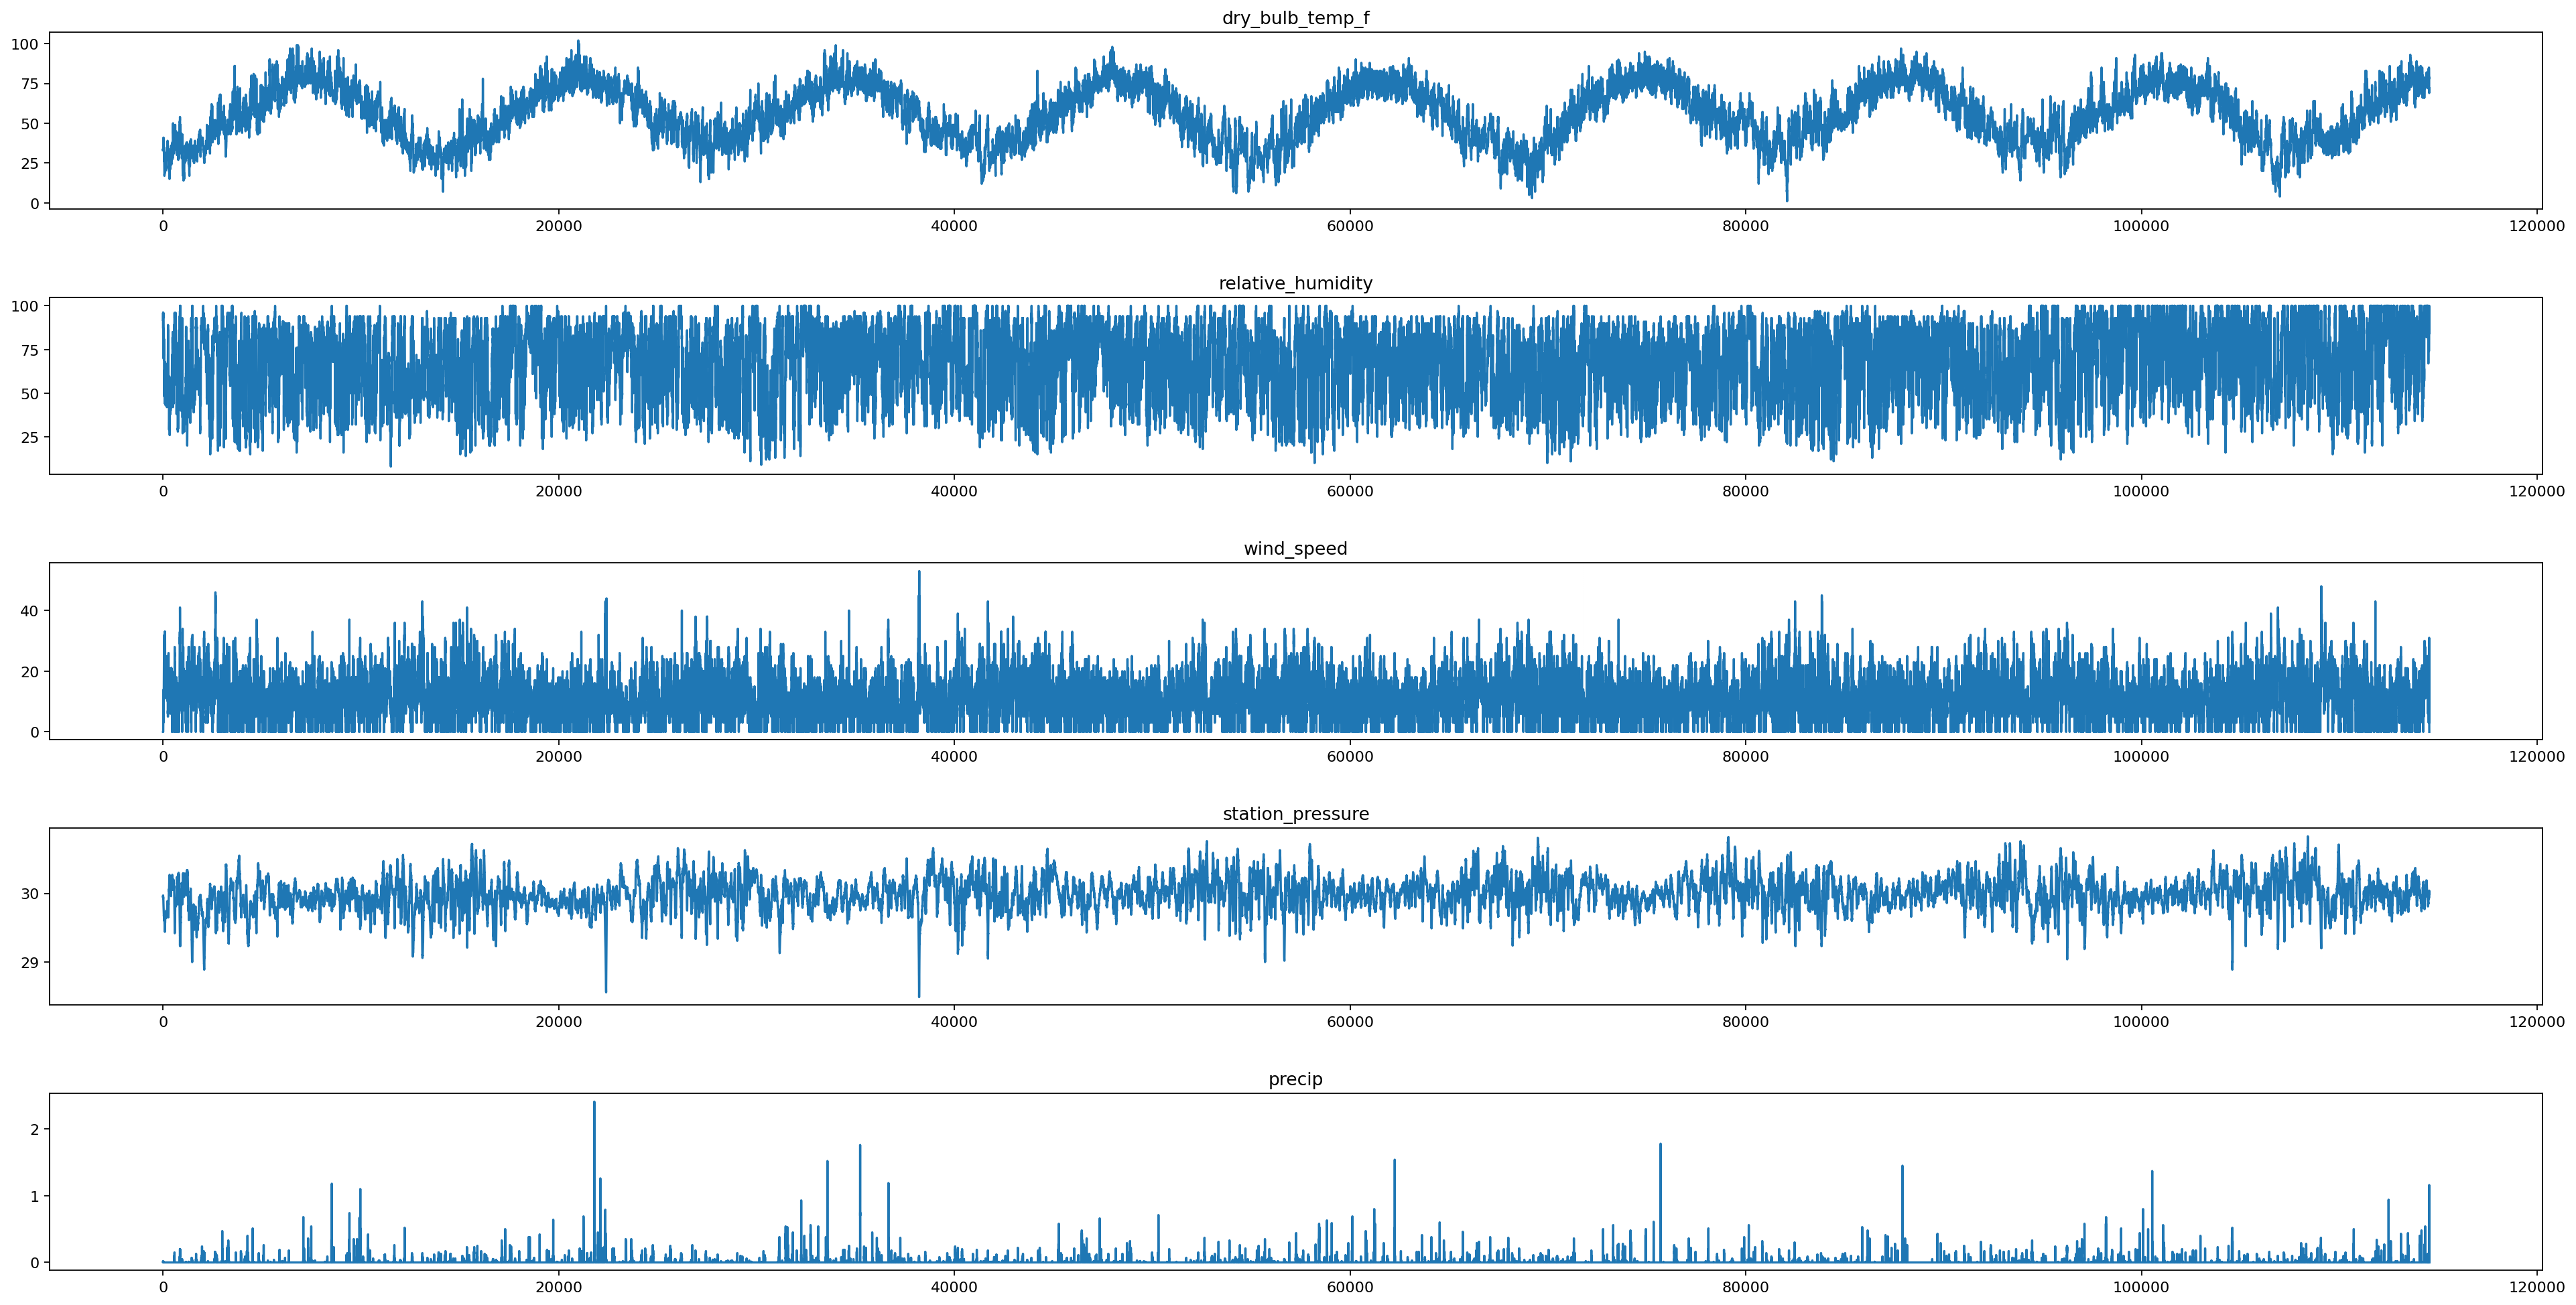

In [381]:
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']

plt.figure(figsize=(30,15))

for i, col in enumerate(plot_cols):
    plt.subplot(len(plot_cols), 1, i+1)
    plt.plot(data[col].values)
    plt.title(col)
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Feature Dependencies

Now we explore how the features (columns) of our data are related to each other. This helps in deciding which features to use when modelling a classifier or regresser. We ideally want independent features to be classified independently and likewise dependent features to be contributing to the same model.

We can see from the correlation plots how some features are somewhat correlated and could be used as additional data (perhaps for augmenting) when training a classifier.

<Axes: >

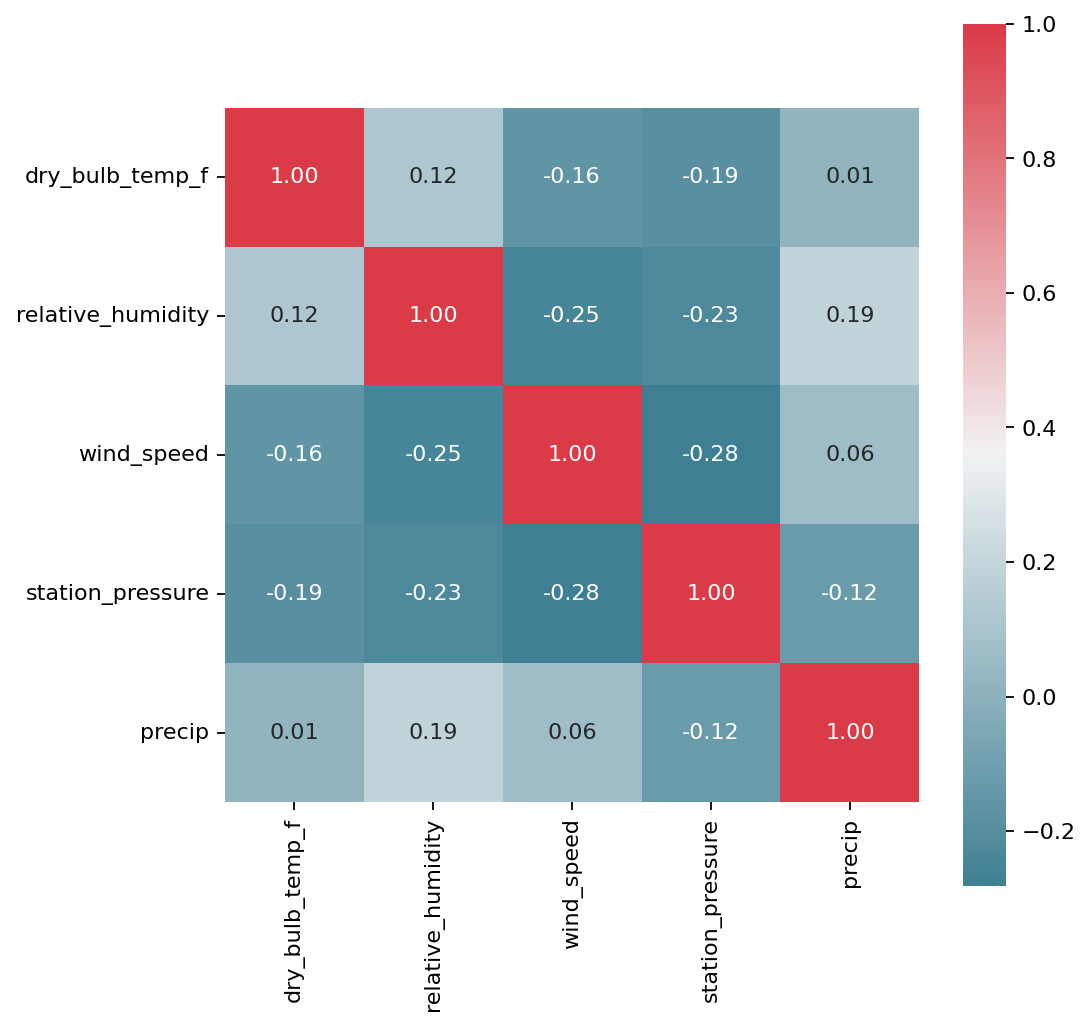

In [382]:
fig, ax = plt.subplots(figsize=(7,7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype='bool'), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax, annot=True, fmt=".2f")

Additionally we also visualize the joint distrubitions in the form of pairplots/scatter plots to see (qualitatively) the way in which these features are related in more detail over just the correlation. They are essentially 2D joint distributions in the case of off-diagonal subplots and the histogram (an approximation to the probability distribution) in case of the diagonal subplots.

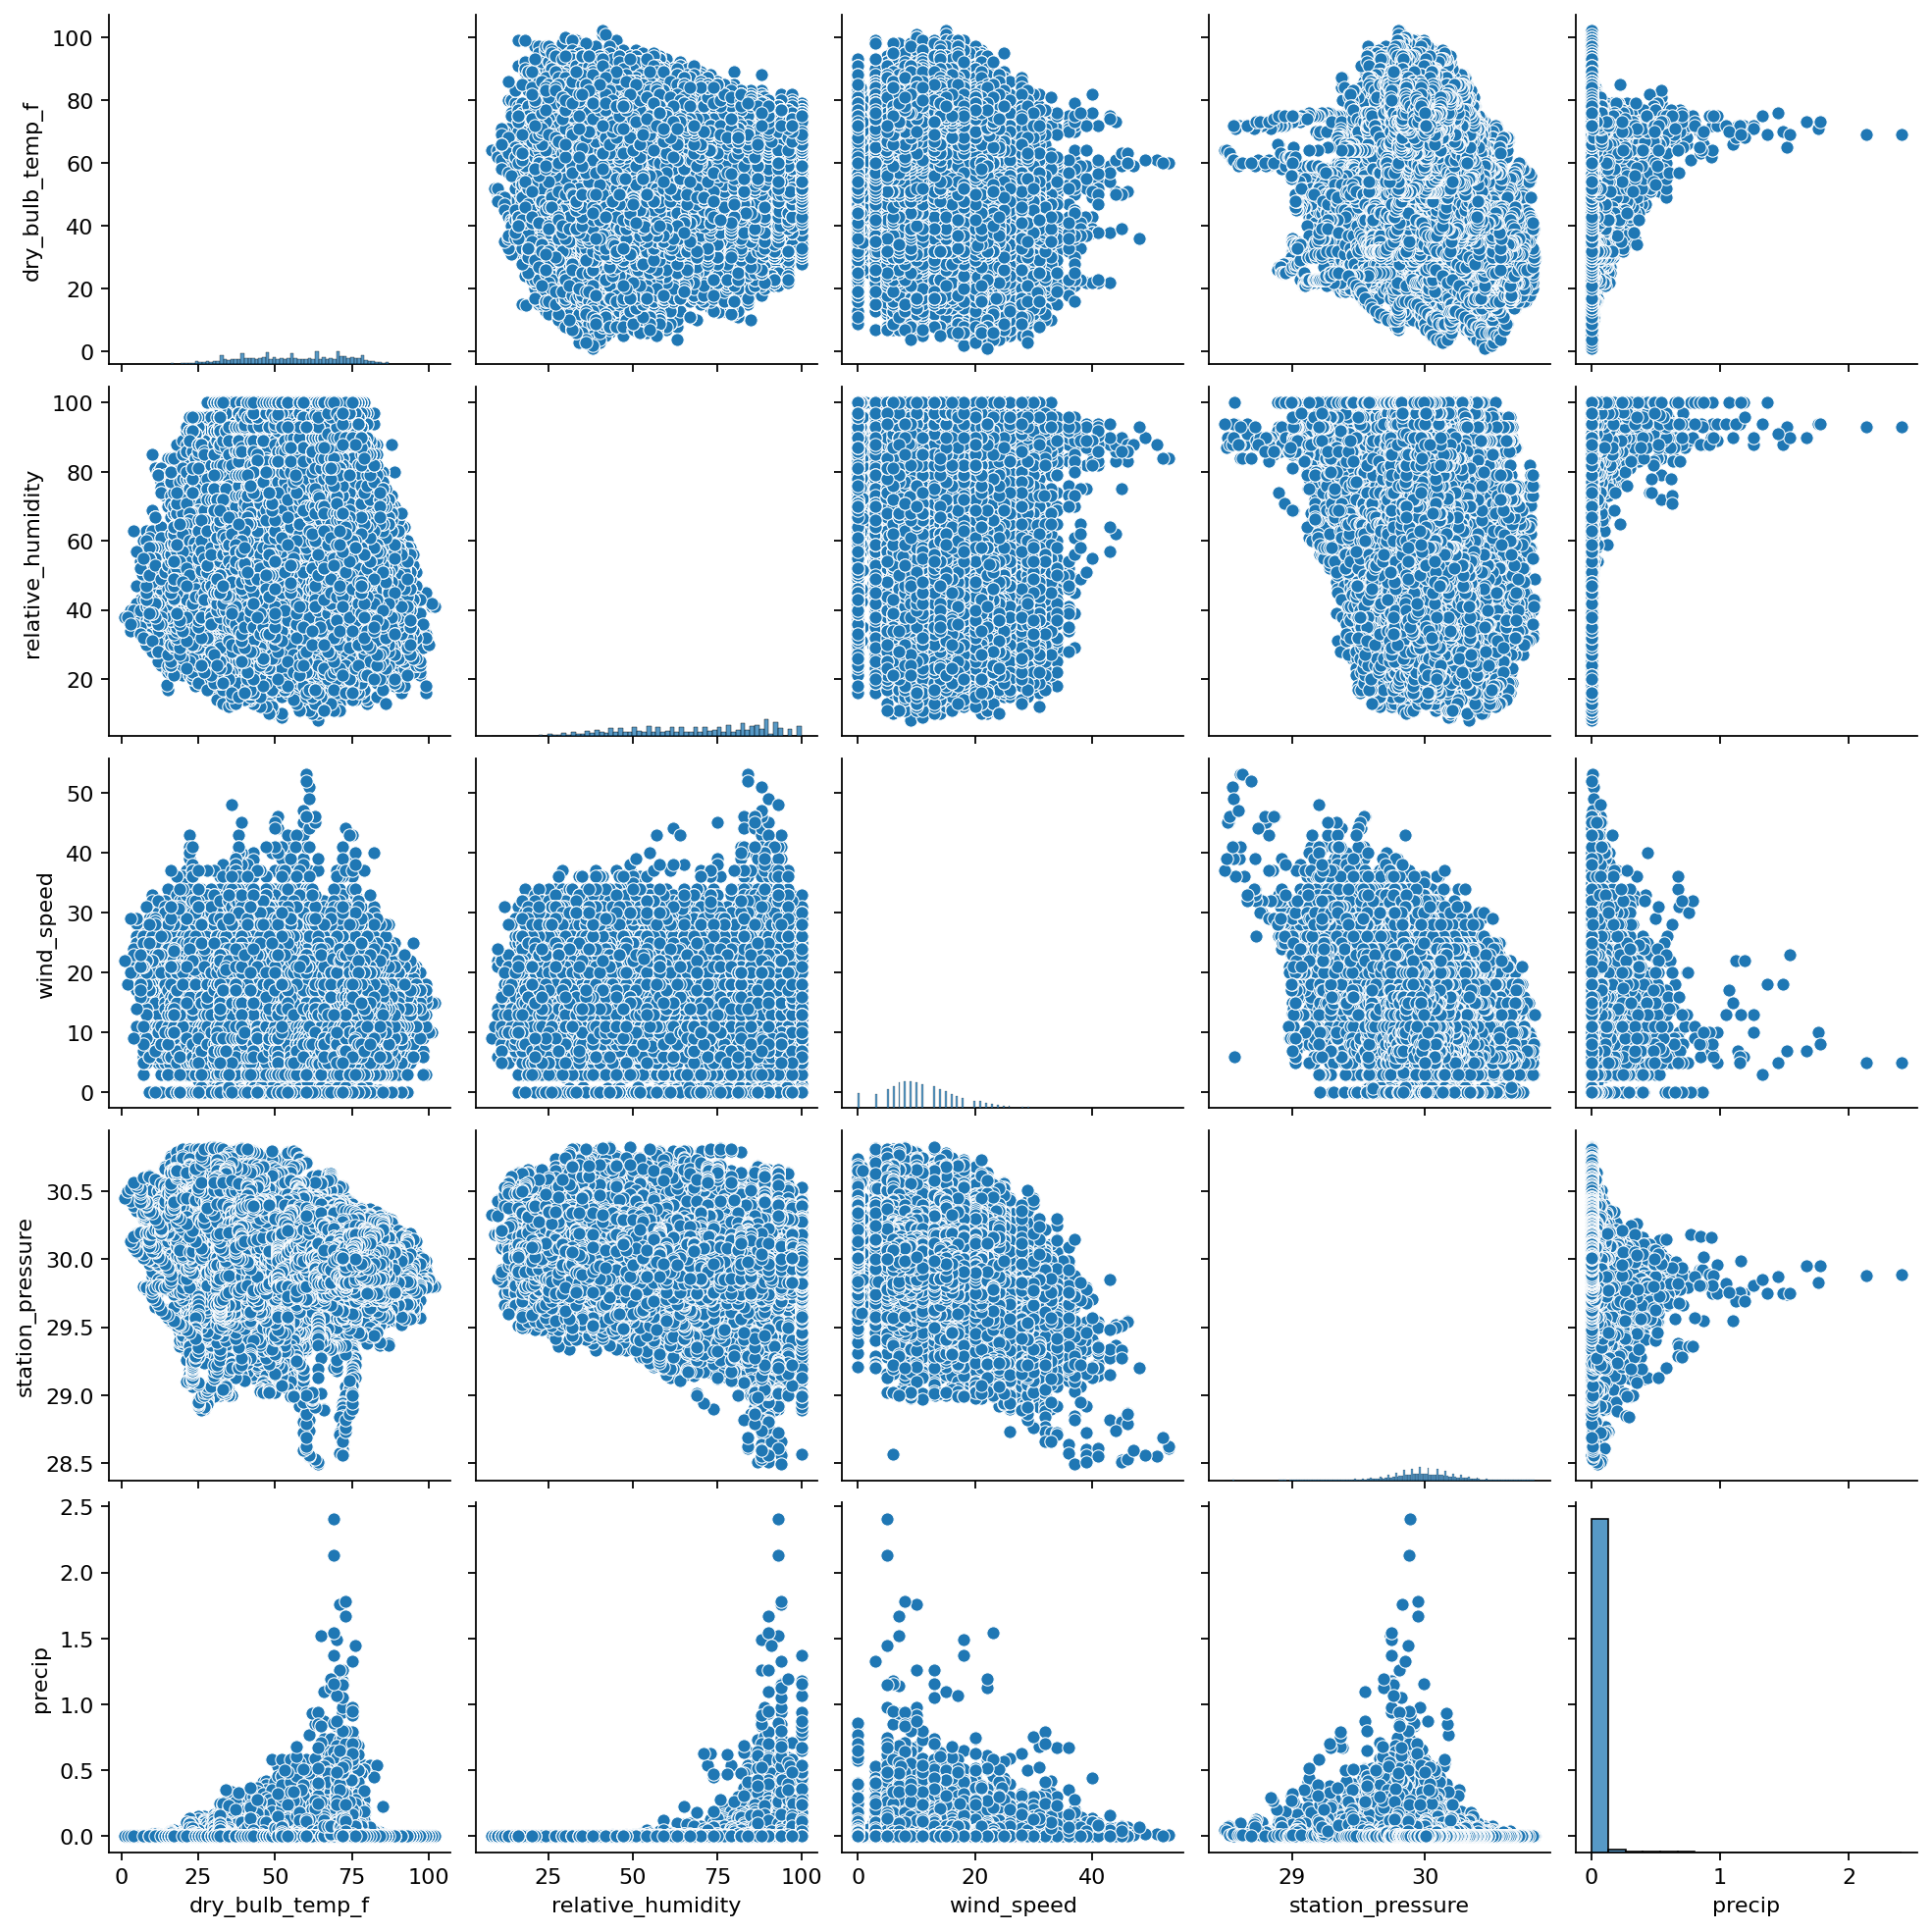

In [383]:
sns.pairplot(data[plot_cols])

#### Analyze Trends in the Data

Now that we have explored the whole dataset and the features on a high level, let us focus on one particular feature - `dry_bulb_temp_f`, the dry bub temperature in degrees Fahrenheit. this is what we mean when we refer to "air temperature". This is the most common feature in temperature prediction, and here we explore it in further detail.

We first start with plotting the data for all 9 years in monthly buckets then drill down to a single year to notice (qualitatively) the overall trend in the data. We can see from the plots that every year has roughly a sinousoidal nature to the temperature with some anomalies around 2013-2014. Upon further drilling down we see that each year's data is not the smooth sinousoid but rather a jagged and noisy one. But the overall trend still is a sinousoid.

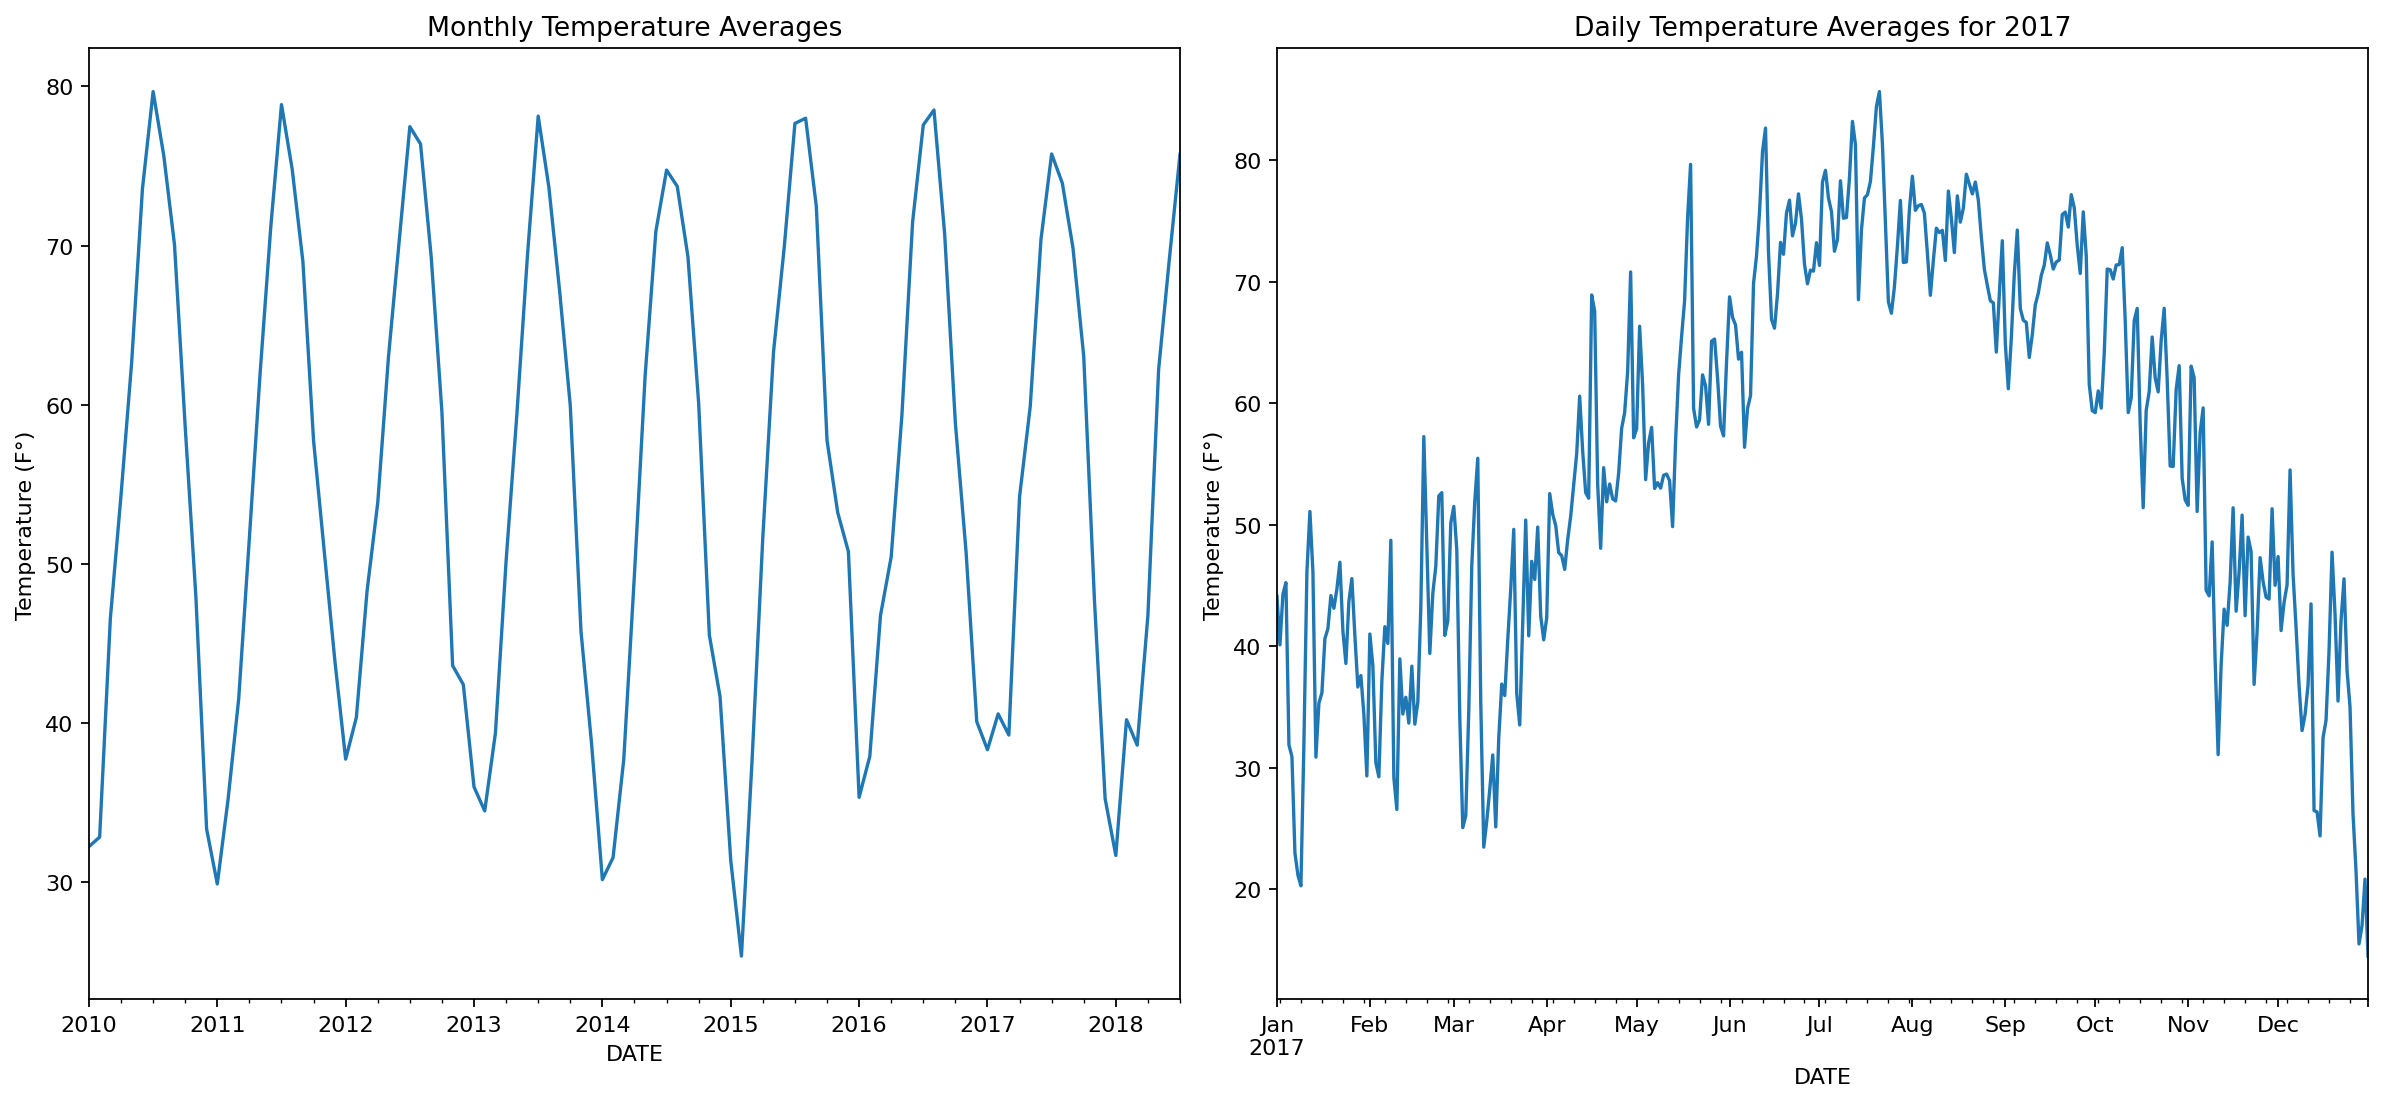

In [384]:
plt.figure(figsize=(15, 7))

TEMP_COL = 'dry_bulb_temp_f'

# Plot temperature data converted to a monthly frequency
plt.subplot(1,2,1)
data[TEMP_COL].resample('M').mean().plot()
plt.title('Monthly Temperature Averages')
plt.ylabel('Temperature (F°)')

# Daily frequency for a year
plt.subplot(1,2,2)
data[TEMP_COL]['2017'].resample('D').mean().plot()
plt.title('Daily Temperature Averages for 2017')
plt.ylabel('Temperature (F°)')

plt.tight_layout()
plt.show()


Next, we plot the change (delta) in temperature and notice that it is lowest around the middle of the year. That is expected behaviour as the gradient of the sinousoid near it's peak is zero.

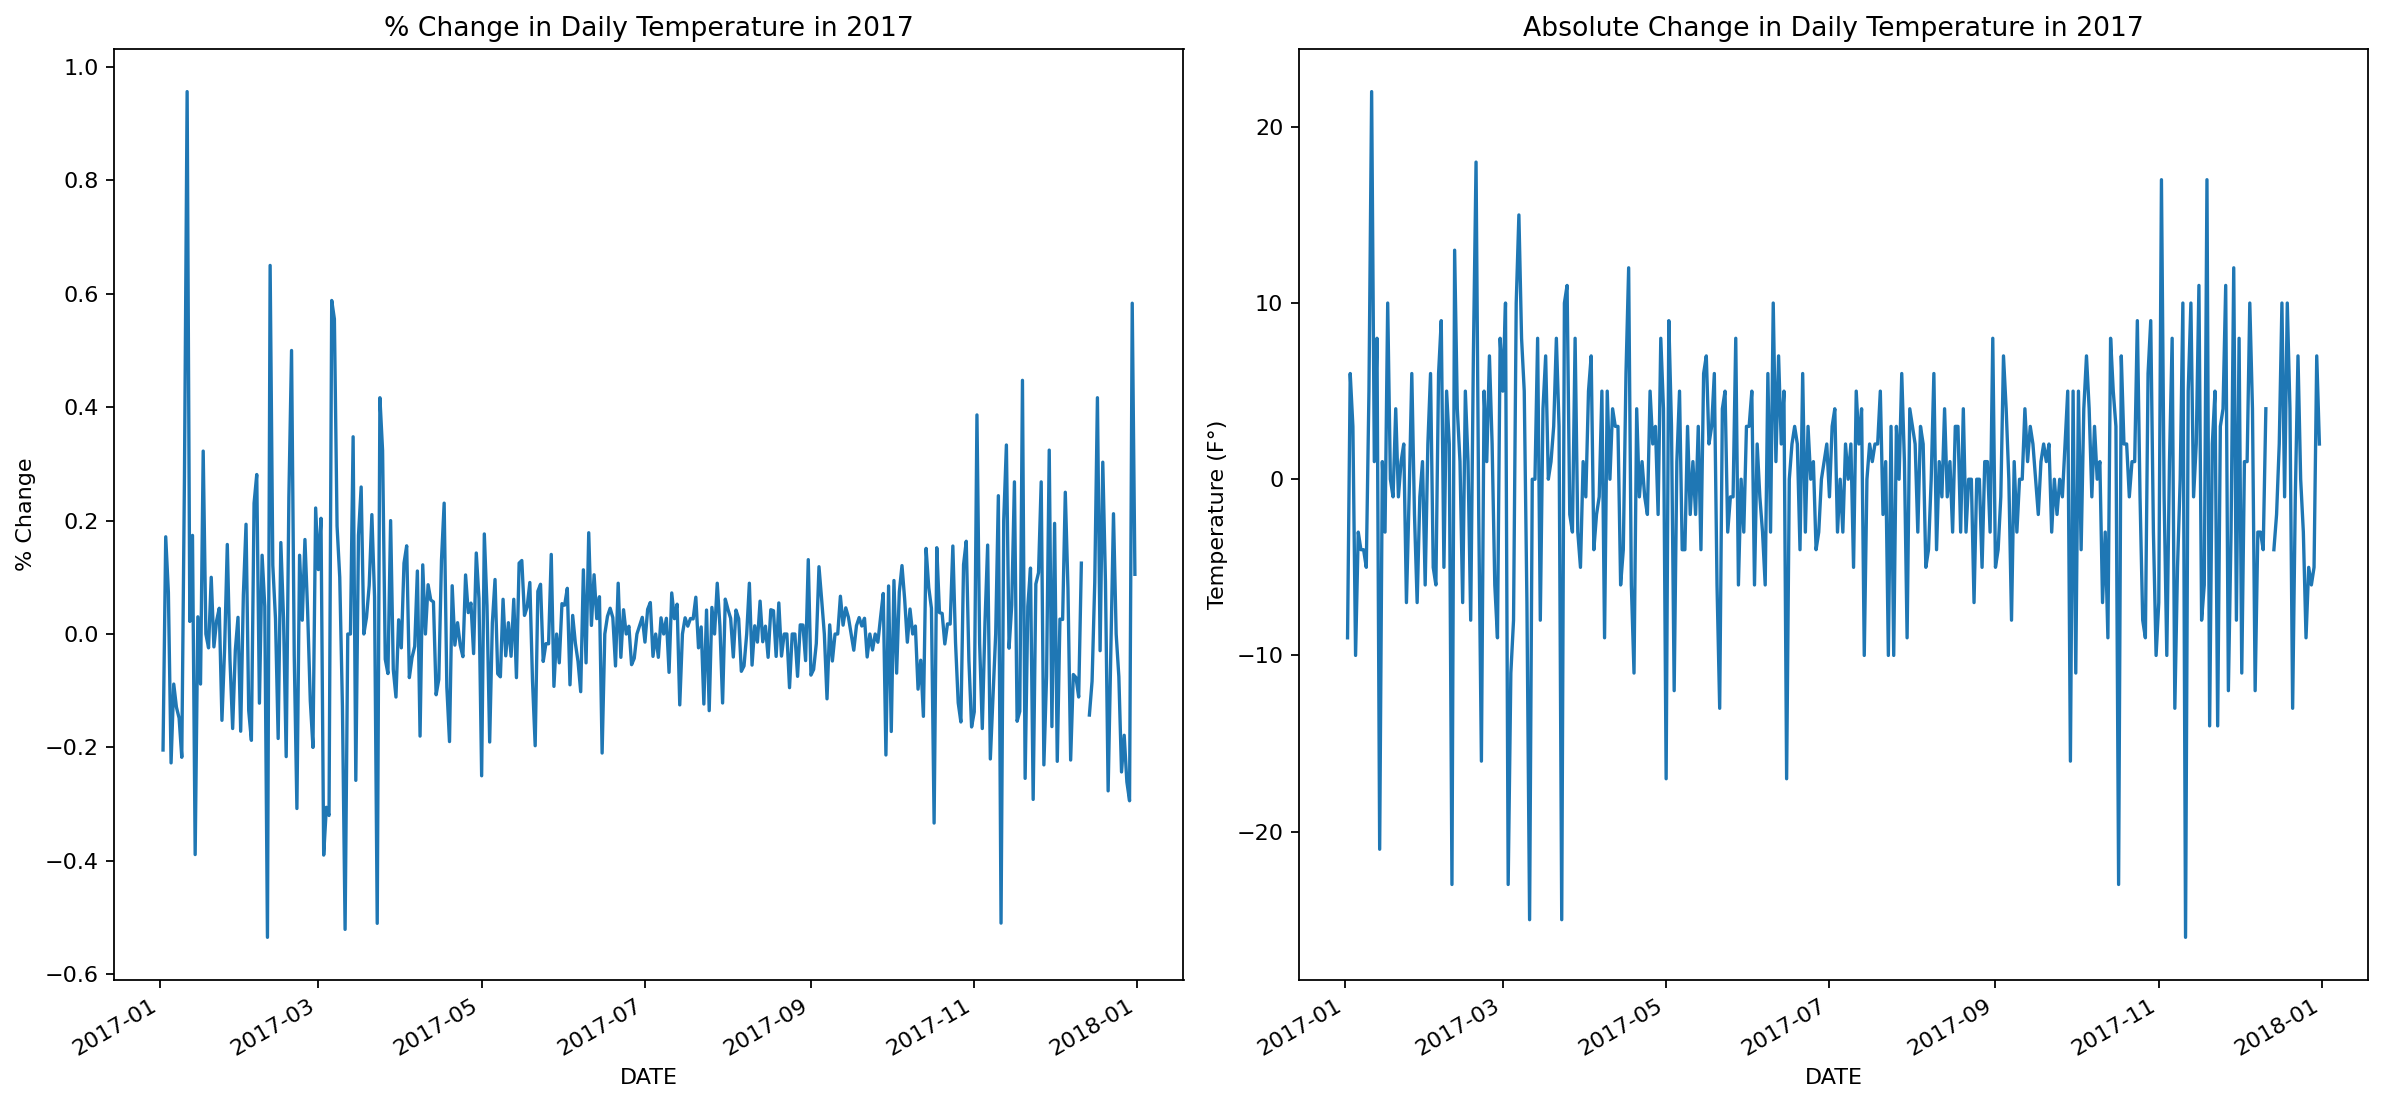

In [385]:
plt.figure(figsize=(15,7))

# Plot percent change of daily temperature in 2017
plt.subplot(1,2,1)
data[TEMP_COL]['2017'].asfreq('D').pct_change(fill_method=None).plot()
plt.title("% Change in Daily Temperature in 2017")
plt.ylabel('% Change')

# Absolute change of temperaturein 2017 with daily freq
plt.subplot(1,2,2)

data[TEMP_COL]['2017'].asfreq('D').diff().plot()
plt.title("Absolute Change in Daily Temperature in 2017")
plt.ylabel("Temperature (F°)")

plt.tight_layout()
plt.show()

Finally we apply some smoothing to the dat ain the form of a rolling/moving average. This is the simplest form of denoising the data. As we can see from the pltos, the average (plotted in blue) roughly traces the sinousoid and is now much smoother. This can improve the accuracy of a regeression model trained to predict temperatures within a reasonable margin of error.

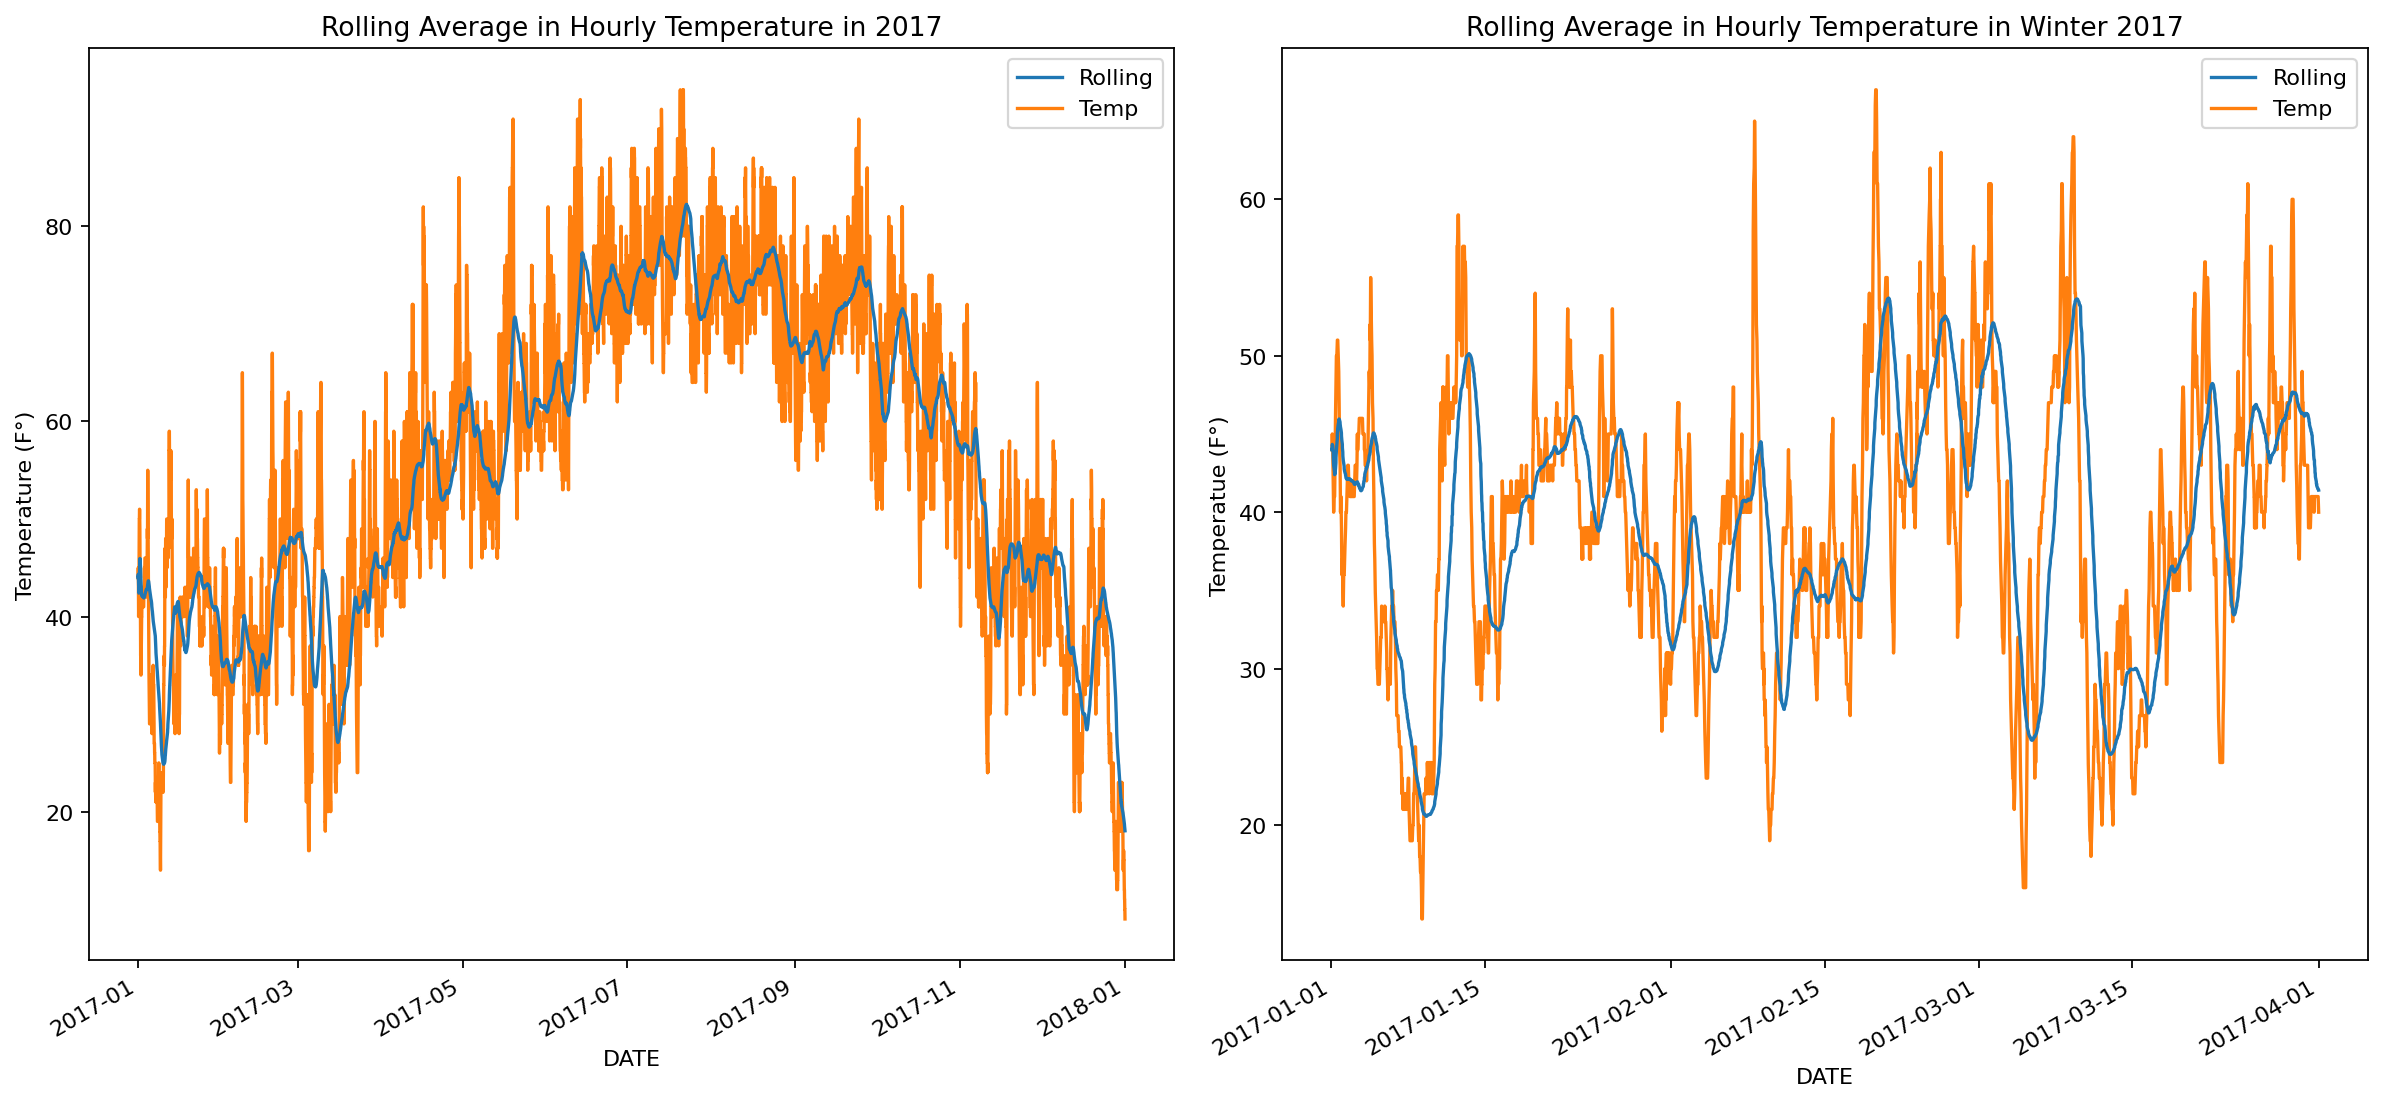

In [386]:
plt.figure(figsize=(15,7))

# Rolling mean of temp
plt.subplot(1,2,1)
data[TEMP_COL]['2017'].rolling('5D').mean().plot(zorder=2)  # 5-day rolling mean
data[TEMP_COL]['2017'].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title("Rolling Average in Hourly Temperature in 2017")
plt.ylabel("Temperature (F°)")

# Rolling mean of temperature for Jan-Mar 2017
plt.subplot(1,2,2)
data[TEMP_COL]['2017-01':'2017-03'].rolling('2D').mean().plot(zorder=2) # 2-day rolling mean
data[TEMP_COL]['2017-01':'2017-03'].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title("Rolling Average in Hourly Temperature in Winter 2017")
plt.ylabel("Temperatue (F°)")

plt.tight_layout()
plt.show()

---

## Part 3: Time Series Forecasting

In [387]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

For puposes of time-series modeling, we will restict our analysis to a 2-year sample of the dataset to avoid overly long model-training times.

In [388]:
# Filter 2 years sample (2016-2018)
sample = data['2016-01-01':'2018-01-01']
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26289 entries, 2016-01-01 00:51:00 to 2018-01-01 23:59:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visibility               26289 non-null  float64
 1   dry_bulb_temp_f          26289 non-null  float64
 2   wet_bulb_temp_f          26289 non-null  float64
 3   dew_point_temp_f         26289 non-null  float64
 4   relative_humidity        26289 non-null  float64
 5   wind_speed               26289 non-null  float64
 6   station_pressure         26289 non-null  float64
 7   sea_level_pressure       26289 non-null  float64
 8   precip                   26289 non-null  float64
 9   altimeter_setting        26289 non-null  float64
 10  wind_direction_sin       26289 non-null  float64
 11  wind_direction_cos       26289 non-null  float64
 12  pressure_tendency_incr   26289 non-null  float32
 13  pressure_tendency_decr   26289 non-null  

#### Create Training/Validation/Test Splits

Before we attempt any time-series analysis and prediction, we should split the dataset into training, validation and test sets. We use a portion of the data for training, and a portion of future data for our validation and test sets.

If we instead trained a model on the full dataset, the model would learn to be very good at making predicitions on that particular dataset, essentially just copying the answer it knows. However, when presented with data the model has not seen, it would perform poorly since it has not learned how to generalize its answers.

By training on a portion of the dataset and testing the model's performance on another portion of the dataset (which data the model has not seen in training), we try to avoid our models "over-fitting" the dataset and make them better at predicting temperatures given unseen, future data. This process of splitting the dataset and evaluating a model's performance on the validation and test sets is commonly known as `cross-validation`).

By default here we use 80% of the data for the training set and 10% each for validation and test sets.

In [389]:
def split_data(data, val_size=0.1, test_size=0.1):
    """
    Splits data to training, validation and testing parts
    """

    ntest = int(round(len(data) * (1 - test_size))) 
    nval = int(round(len(data) * (1 - test_size - val_size))) 

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]

    return df_train, df_val, df_test

# Create data split
df_train, df_val, df_test = split_data(sample)

print(f"Total data size: {len(sample)} rows")
print(f"Training set size: {len(df_train)} rows")
print(f"Validation set size: {len(df_val)} rows")
print(f"Test set size: {len(df_test)} rows")

Total data size: 26289 rows
Training set size: 21031 rows
Validation set size: 2629 rows
Test set size: 2629 rows


#### Explore Baseline Models

Create a few simple predictive models of temperature, using shifting and rolling averages. These will serve as a basline against which we can compare more sophisticated models.

Using values at recent timesteps (such as the most recent timestep t-1 and second-most recent timestep t-2) to predict the curretn value at time t is what's known as perisistence modeling, or using the last observed value to predict the next following value. Thse preceding timesteps are often referred to in time-series anlysis as lags. So, the value at time t-1 is known as the 1st lag and the value at time t-2 is tha 2nd lag.

We can also create baslines based on rolling (or moving) averages. This is a time-series constructed by averaging each lagged value up to the selected lag. For example, a 6-period (or 6-lag) rolling average is the average of the previous 6 hourly lags t-6 to t-1.

The baseline models will be:
* 1st lag - i.e. values at t-1
* 2nd lag - i.e. values at t-2
* 6-lag rolling average
* 12-lag rolling average

In [390]:
# column containing the data to be modeled
Y_COL = 'dry_bulb_temp_f'

# Use shifting and rolling averages to predict Y_COL (t)
n_in = 2
n_out = 1
features = [Y_COL]
n_features = len(features)

# Create the baseline on the entire sample dataset
# We will evaluate the prediction error on the validation set
baseline = sample[[Y_COL]].copy()
baseline[f'{Y_COL} (t-1)'] = baseline[Y_COL].shift(1)
baseline[f'{Y_COL} (t-2)'] = baseline[Y_COL].shift(2)
baseline[f'{Y_COL} (6hr rollavg)'] = baseline[Y_COL].rolling('6H').mean()
baseline[f'{Y_COL} (12hr rollavg)'] = baseline[Y_COL].rolling('12H').mean()
baseline.dropna(inplace=True)
baseline.head(10)

dry_bulb_temp_f  dry_bulb_temp_f (t-1)  \
DATE                                                          
2016-01-01 01:51:00             43.0                   43.0   
2016-01-01 02:51:00             42.0                   43.0   
2016-01-01 03:51:00             43.0                   42.0   
2016-01-01 04:00:00             43.0                   43.0   
2016-01-01 04:51:00             42.0                   43.0   
2016-01-01 05:51:00             41.0                   42.0   
2016-01-01 06:51:00             41.0                   41.0   
2016-01-01 07:00:00             41.0                   41.0   
2016-01-01 07:51:00             41.0                   41.0   
2016-01-01 08:51:00             40.0                   41.0   

                     dry_bulb_temp_f (t-2)  dry_bulb_temp_f (6hr rollavg)  \
DATE                                                                        
2016-01-01 01:51:00                   43.0                      43.000000   
2016-01-01 02:51:00                   43.0                      42.750000   
2016-01-01 03:51:00                   43.0                      42.800000   
2016-01-01 04:00:00                   42.0                      42.833333   
2016-01-01 04:51:00                   43.0                      42.714286   
2016-01-01 05:51:00                   43.0                      42.500000   
2016-01-01 06:51:00                   42.0                      42.250000   
2016-01-01 07:00:00                   41.0                      42.000000   
2016-01-01 07:51:00                   41.0                      41.750000   
2016-01-01 08:51:00                   41.0                      41.500000   

                     dry_bulb_temp_f (12hr rollavg)  
DATE                                                 
2016-01-01 01:51:00                       43.000000  
2016-01-01 02:51:00                       42.750000  
2016-01-01 03:51:00                       42.800000  
2016-01-01 04:00:00                       42.833333  
2016-01-01 04:51:00                       42.714286  
2016-01-01 05:51:00                       42.500000  
2016-01-01 06:51:00                       42.333333  
2016-01-01 07:00:00                       42.200000  
2016-01-01 07:51:00                       42.090909  
2016-01-01 08:51:00                       41.916667

Next, we will plot data from our validation dataset to get a sense for how well these baseline models predict the next hourly temperature. Note that we only use a few days of data in order to make the plot easier to view.

In [391]:
# Plot first 7 days of the validation set, 168 hours
start = df_val.index[0]
end = start + pd.Timedelta(days=7)
#end = df_val.index[167]
sliced = baseline[start:end]

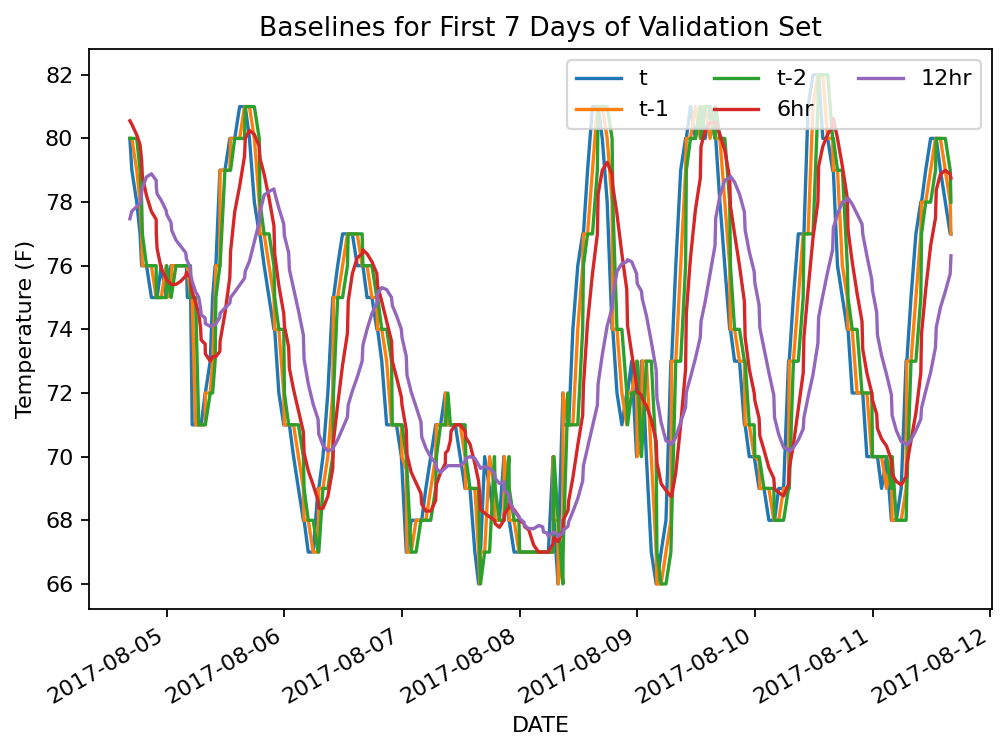

In [392]:
# Plot baseline predictions sample
cols = ['dry_bulb_temp_f', 'dry_bulb_temp_f (t-1)', 'dry_bulb_temp_f (t-2)',
       'dry_bulb_temp_f (6hr rollavg)', 'dry_bulb_temp_f (12hr rollavg)']
sliced[cols].plot()

plt.legend(['t', 't-1', 't-2', '6hr', '12hr'], loc=1, ncol=3)
plt.title('Baselines for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.rcParams['figure.dpi'] = 100
plt.show()

Evaluate baseline models. As you can perhaps see from the graph above, the lagged baselines appear to do a better job of forecasting temperatures than the rolling average baselines.

In order to evaluate our baseline models more precisely, we need to answer the question "how well do our models predict future temperature?". In regression problems involving prediction of a numerical value, we often use a measure of the difference between our predicted value and the actual value. This is referred to as an error measure or error metric. A common measure is the Mean Squared Error (MSE):

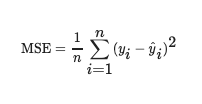

This is the average of the sqaured differences between predicted values and actual values.

Because the MSE is in "units squared" it can be difficult to interpret, hence the Root Mean Squared Error (RMSE) is often used:

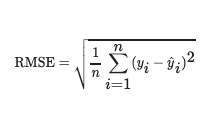

THis is the sqaure root of the MSE, and is in the same units as the values. We can compare the RMSE (and MSE) values for different models and say that the model that has the lower MSE is better at predicting temperatures, all thing equal. Note that MSE and RMSE will grow large quickly if the differences between predicted and actual values are large. This may or may not be a desired quality of your error measure. In this case, it is probably a good thing, since a model that makes large mistakes in temperature prediction will be much less useful than one which makes small mistakes.

Next, we calculate the RMSE measure for each of our baseline models, on the full validation set.

In [393]:
# Calculating baseline RMSE
start_val = df_val.index[0]
end_val = df_val.index[-1]
baseline_val = baseline[start_val:end_val]

baseline_y = baseline_val[Y_COL]
baseline_t1 = baseline_val['dry_bulb_temp_f (t-1)']
baseline_t2 = baseline_val['dry_bulb_temp_f (t-2)']
baseline_avg6 = baseline_val['dry_bulb_temp_f (6hr rollavg)']
baseline_avg12 = baseline_val['dry_bulb_temp_f (12hr rollavg)']

rmse_t1 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t1)), 2)
rmse_t2 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t2)), 2)
rmse_avg6 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg6)), 2)
rmse_avg12 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg12)), 2)

print(f'Baseline t-1 RMSE:          {rmse_t1:.3f}')
print(f'Baseline t-2 RMSE:          {rmse_t2:.3f}')
print(f'Baseline 6hr rollavg RMSE:  {rmse_avg6:.3f}')
print(f'Baseline 12hr rollavg RMSE: {rmse_avg12:.3f}')

Baseline t-1 RMSE:          1.380
Baseline t-2 RMSE:          2.210
Baseline 6hr rollavg RMSE:  3.020
Baseline 12hr rollavg RMSE: 4.750


The RMSE results confirm what we saw in the graph above. It is clear that the rolling average baselines perform poorly. In fact, the t-2 lagged baseline is also not very good. It appears that the best baseline model is to simply use the current hour's temperature to predict the next hour's temperature!

Can we do better than this simple baseline using more sophisticated models?

---

#### Train Statistical Time-series Analysis Models

In the previous section, we saw that a simple lag-1 baseline model performed reasonably well at forecasting temperature for the next hourly time step. This is perhaps not too surprising, given what we know about hourly temperatures. Generally, the temperature in a given hour will be quite closely related to the temperature in the previous hour. This phenomenon is very common in time-series analysis and is known as autocorrelation- that is, the time series is correlated with previous values of itself. More precisely,  the values at tme t are correlated with lagged values (which could be t-1, t-2 and so on).

Another thing we saw previously is the concept of moving averages. In this case the moving-average baseline was not that good at prediction. however it is common in many time-series for a moving average to capture some of the underlying structure and be useful for prediction.

In order to make our model better at predicting temperature, ideally we would want to take these aspects into accounts. Fortunately, the statistical community has a long history of analyzing time series and has created many different forecasting models.

Here, we will explore one called SARIMAX - the Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model.

This sounds like a very complex name, but if we look at the componenets of the name, we see that it includes autocorrelation (this is what auto regressive means) and moving averages, which are the components mentioned above.

The SARIMAX model also allows including a seasonal model component as well as handling exogenous variables, which are external to the time-series value itself. For example, for temperature prediction we may wish to take into account not just previous temperature values, but perhaps other weather features whcih may have an effect on temperature (such as humidity, rainfall, wind, and so on).

For the purposes of this notebook, we will not explore modelling of seasonal componenets or exogenous variables.

If we drop the "S" and "X" from the model, we are left with an ARIMA model (Auto-regressive Integrated Moving Average). This is a very commonly used model for time-series analysis and we will use it in this notebook by only specifying the relevant model componenets of the full SARIMAX model.

#### Replicating a Baseline Model

As a starting point, we will see how we can use SARIMAX to create a simple model that in fact replicates one of the baselines we created previously. Auto-regressive, as we have seen, means using values from preceding time periods to predict the current value. Recall that one of our baseline models was the 1st lag or t-1 model. In time-series analysis this is referred as an AR(1) model, meaning an Auto-Regressive model for lag 1.

Technically, the AR(1) model is not exactly the same as our baseline model. A statistical time series model like SARIMAX learns a set of weights to apply to each components of the model. These weights are set so as to best fit the datasets. We can think of our baseline as setting the weight for the t-1 lag to be exactly 1. In practice, our time-series model will not have a weight of exactly 1 (though it will likely we very close to that), hence the predictions will be slightly different.

Now, lets fit our model to the dataset. First, we will set up the model inputs by taking the temperature column of our dataframe. We do this for training and validation sets.

In [394]:
X_train = df_train[Y_COL]
X_val = df_val[Y_COL]
X_both = np.hstack((X_train, X_val))

Here we created a variable called X_both to cover both the training and validation data. This is required later when we forecast values for our SARIMAX model, in order to give the model to all the datapoints for which it must create forecasts. Note that the forecasts themselves will only be based on the model weights learned from the training data (this is important for over-fitting as we have seen above)!

The SARIMAX model takes an argument called order: this specifies the componenets of the model and itself has 3 parts: (p, d , q). p denotes the lags for the AR model and q denotes the lags for the MA model. We will not cover the d parameter here. Taken together this specifies the parameters of the ARIMA model portion of SARIMAX.

To create an AR(1) model, we set the order to be (1,0,0). This sets up the AR mdoel to be a lag 1 model. Then, we fit our model on the training data and inspect a summary of the trained model.

In [395]:
order = (1, 0, 0)
model_ar1 = SARIMAX(X_train, order=order)
results_ar1 = model_ar1.fit()
results_ar1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76485D+00    |proj g|=  2.22565D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      4      1     0     0   1.611D-06   1.765D+00
  F =   1.7648513310414622     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                21031
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -37116.588
Date:                Mon, 12 Jan 2026   AIC                          74237.177
Time:                        00:38:18   BIC                          74253.084
Sample:                             0   HQIC                         74242.368
                              - 21031                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.000   6390.996      0.000       0.999       1.000
sigma2         1.9966      0.011    187.610      0.000       1.976       2.017
===================================================================================
Ljung-Box (L1) (Q):                 777.25   Jarque-Bera (JB):             19586.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

[1] Covariance matrix calculated using the outer product of gradients (complex-step). There's quite a lot of information printed out in the model summary above. Much of it is related to the statistical properties of our model.

The most important thing for now is to look at the second table, where we can see a coef value of 0.9996 for the wight ar.L1. This tells us the model has set a weight for the 1st lag component of the AR model to be 0.9996. This is almost 1 and hence we should expect the prediction results to indeed be close to our t-1 baseline.

Let's create our model forecast on the validation dataset. We will then plot a few data points like we did with our baseline models (using 7 days of validation data) and compute the RMSE value based on the full validation set.

In [396]:
full_data_ar1 = SARIMAX(X_both, order=order)
model_forecast_ar1 = full_data_ar1.filter(results_ar1.params)

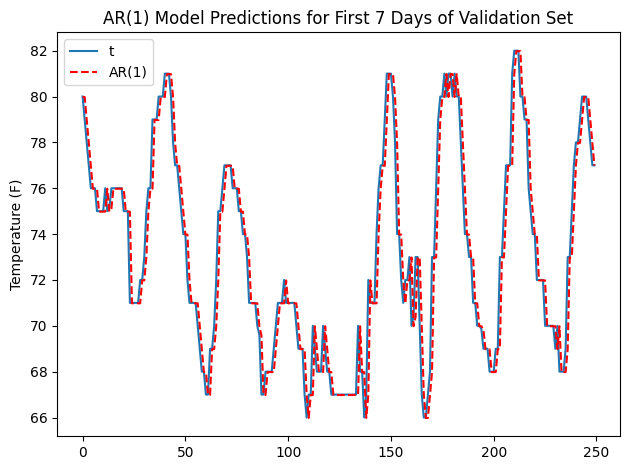

In [397]:
start = len(X_train)
end = len(X_both)
forecast_ar1 = model_forecast_ar1.predict(start=start, end=end - 1, dynamic=False)

# Plot actual vs predicted values for the same 7-day window for easier viewing
plt.plot(sliced[Y_COL].values)
plt.plot(forecast_ar1[:len(sliced)], color='r', linestyle='--')
plt.legend(['t', 'AR(1)'], loc=2)
plt.title("AR(1) Model Predictions for First 7 Days of Validation Set")
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.show()

We can see that the plot looks almost identical to the plot above, for the t and t-1 baseline values.

Next, we compute the RMSE values.

In [400]:
# compute print RMSE values
rmse_ar1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar1))
print(f'AR(1) RMSE:              {rmse_ar1:.3f}')
print(f'Baseline t-1 RMSE:       {rmse_t1:.3f}')

AR(1) RMSE:              1.383
Baseline t-1 RMSE:       1.380


We can see that the RMSE values for the validation set also almost identical.

----

## Create a more complex model

One of our baseline models was a lag 2 model, i.e. t-2. We saw that it performed a lot worse than the t-1 baseline. Intuitively, this makes sense, since we are throwing away a lot of information about the most recent lag t-1. However, the t-2 lag still provides some useful information. In fact, for temperature prediction it's likely that the last few hours can provide some value.

Fortunately, our ARIMA model framework provides an easy way to incorporate furhter lag information. We can construct a model that includes both the t-1 and t-2 lags. This is an AR(2) model (meaning an auto-regressive model up to lag-2). We can specify this with the model order parameter p=2.

In [402]:
order = (2, 0, 0)
model_ar2 = SARIMAX(X_train, order = order)
results_ar2 = model_ar2.fit()
results_ar2.summary()


/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74599D+00    |proj g|=  5.64088D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      4      1     0     0   3.766D-06   1.746D+00
  F =   1.7459925314714291     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                21031
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -36719.969
Date:                Mon, 12 Jan 2026   AIC                          73445.938
Time:                        01:02:41   BIC                          73469.799
Sample:                             0   HQIC                         73453.726
                              - 21031                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1921      0.005    222.738      0.000       1.182       1.203
ar.L2         -0.1924      0.005    -35.847      0.000      -0.203      -0.182
sigma2         1.9227      0.010    192.440      0.000       1.903       1.942
===================================================================================
Ljung-Box (L1) (Q):                  22.35   Jarque-Bera (JB):             22477.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Warnings:

[1] Covariance matrix calculated using the outer product of gradients (complex-step).

This time, the results table indicates a weight for variable ar.L1 and ar.L2. Note the values are now quite different from 1 (or 0.5 say, for  a simple equally-weighted model). Next, we compute the RMSE on the validation set.

In [405]:
full_data_ar2 = SARIMAX(X_both, order=order)
model_forecast_ar2 = full_data_ar2.filter(results_ar2.params)

start = len(X_train)
end = len(X_both)
forecast_ar2 = model_forecast_ar2.predict(start=start, end=end -1, dynamic=False)

# compute print RMSE values
rmse_ar2 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2))
print(f'AR(2) RMSE:             {rmse_ar2:.3f}')
print(f'AR(1) RMSE:             {rmse_ar1:.3f}')
print(f'Baseline t-1 RMSE:      {rmse_t1:.3f}')

AR(2) RMSE:             1.334
AR(1) RMSE:             1.383
Baseline t-1 RMSE:      1.380


We've improved the RMSE value by including information from the first two lags.

In fact, you will see that if you continue to increase the p parameter value, the RMSE will continue to decrease, indicating that a few recent lags provide useful information to our model.

#### Incorporate moving averages

Finally, what if we also include moving average information in our model? The ARIMA framework makes this easy to do, by setting the order parameter q. A value of q=1 specifies a MA(1) model (including the first lag t-1), while q=6 would include all the lags from t-1 to t-6.

Note that the moving average model component is a little different from the simple moving or rolling averages computed in the baseline models. The definition of the MA model is rather technical, but conceptually you can think of it as using a form of weighted average (compared to our baseline which would be a simple, unweighted average).

Let's add an MA(1) component to our AR(2) model.

In [406]:
order = (2, 0, 1)
model_ar2ma1 = SARIMAX(X_train, order = order)
results_ar2ma1 = model_ar2ma1.fit()
results_ar2ma1.summary()

/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82134D+04    |proj g|=  1.16415D+05

At iterate    5    f=  7.46145D+01    |proj g|=  1.75962D+02

At iterate   10    f=  4.64952D+00    |proj g|=  6.97503D+00

At iterate   15    f=  2.04481D+00    |proj g|=  2.59057D-01

At iterate   20    f=  1.78792D+00    |proj g|=  8.50310D-02

At iterate   25    f=  1.76448D+00    |proj g|=  3.44580D-03

At iterate   30    f=  1.76370D+00    |proj g|=  1.72789D-03

At iterate   35    f=  1.76370D+00    |proj g|=  1.72011D-03

At iterate   40    f=  1.76345D+00    |proj g|=  9.75964D-03

At iterate   45    f=  1.76001D+00    |proj g|=  1.09422D-01

At iterate   50    f=  1.73078D+00    |proj g|=  4.25977D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                21031
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -36400.114
Date:                Mon, 12 Jan 2026   AIC                          72808.229
Time:                        01:13:09   BIC                          72840.044
Sample:                             0   HQIC                         72818.612
                              - 21031                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6655      0.018     93.267      0.000       1.631       1.701
ar.L2         -0.6662      0.018    -37.337      0.000      -0.701      -0.631
ma.L1         -0.5183      0.020    -25.570      0.000      -0.558      -0.479
sigma2         1.8414      0.009    197.743      0.000       1.823       1.860
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):             24518.60
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Warnings:

[1] Covariance matrix calculated using the outer product of gradients (complex-step).

We see the results table shows an additional weight value for ma.L1, our MA(1) component. Next, we compare the RMSE to the other models and finally plot all the model forecasts together - note we use a much smaller 48-hour window to maek the plot readable for illustrative purposes.

In [408]:
full_data_ar2ma1 = SARIMAX(X_both, order=order)
model_forecast_ar2ma1 = full_data_ar2ma1.filter(results_ar2ma1.params)

start = len(X_train)
end = len(X_both)
forecast_ar2ma1 = model_forecast_ar2ma1.predict(start=start, end=end - 1, dynamic=False)

# Compute print RMSE values
rmse_ar2ma1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2ma1))
print(f'AR(2) MA(1) RMSE:            {rmse_ar2ma1:.3f}')
print(f'AR(2) RMSE:                  {rmse_ar2:.3f}')
print(f'AR(1) RMSE:                  {rmse_ar1:.3f}')
print(f'Baseline t-1 RMSE:           {rmse_t1:.3f}')

AR(2) MA(1) RMSE:            1.308
AR(2) RMSE:                  1.334
AR(1) RMSE:                  1.383
Baseline t-1 RMSE:           1.380


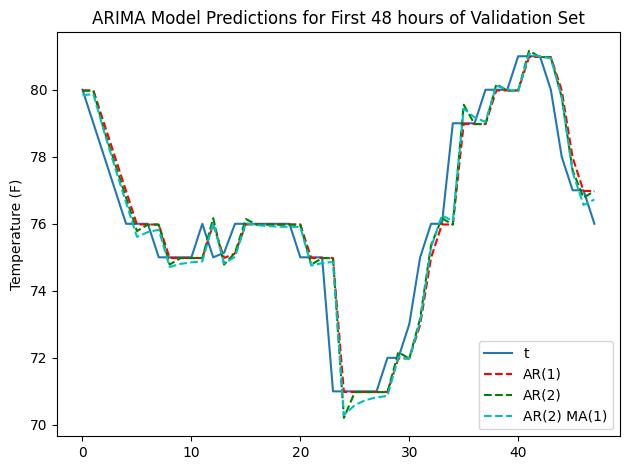

In [412]:
# Plot actual vs predicted values for a smaller 2-day window for easier viewing
hrs = 48
plt.plot(sliced[Y_COL][:hrs].values)
plt.plot(forecast_ar1[:hrs], color='r', linestyle='--')
plt.plot(forecast_ar2[:hrs], color='g', linestyle='--')
plt.plot(forecast_ar2ma1[:hrs], color='c', linestyle='--')
plt.legend(['t', 'AR(1)', 'AR(2)', 'AR(2) MA(1)'], loc=4, ncol=1)
plt.title("ARIMA Model Predictions for First 48 hours of Validation Set")
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.show()

We've again managed to reduce the RMSE value for our model, indicating that adding the MA(1) component has improved our forecast!